# Group 5's Internal Project

## Chosen Problem Statement:
We are a team of Data Analysts looking into HDB Resale Transactions (2017 - 2024), to advise the Housing Development Board (HDB) and Government stakeholders on implementing Policies to maintain Housing affordability. 

We will address this through:
- Analysis of structural , locational and temporal factors and how it affects resale prices. 
- Developing a predictive machine learning model to understand and estimate resale prices
- Identifying key determinants for policymakers to tackle to maintain housing affordability 


# 1) Data Loading and Cleaning

Steps we took:
- Load data -> First look at Data ; using functions such as df.info , df.sample(), etc. 
- Checking for Nan Values and Duplicates ; ensuring Data is clean enough to start Analysing

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

### Importing Key Functions

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

### Loading (Training) Dataset 

In [3]:
# Load dataset
df = pd.read_csv('HDB_Resale_Prices.csv')

### Quick look into Dataset - using df.head(), df.sample(), etc

In [5]:
# Quick view of first 10 rows of Dataset
df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


In [ ]:
# Quick random view of a sample of 10 rows from Dataset
df.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
7189,2017-05,PUNGGOL,5 ROOM,175D,PUNGGOL FIELD,13 TO 15,110.0,Improved,2003,85 years 01 month,430000.0
62894,2019-12,CHOA CHU KANG,5 ROOM,471,CHOA CHU KANG AVE 3,07 TO 09,121.0,Improved,1999,78 years 02 months,410000.0
178642,2024-05,BUKIT BATOK,4 ROOM,288D,BT BATOK ST 25,07 TO 09,92.0,Model A2,1998,73 years,565000.0
25038,2018-04,BUKIT MERAH,5 ROOM,116,BT MERAH CTRL,22 TO 24,117.0,Improved,1977,58 years 07 months,632000.0
48191,2019-04,TOA PAYOH,4 ROOM,145,LOR 2 TOA PAYOH,22 TO 24,92.0,Model A,2006,85 years 09 months,768000.0
10205,2017-07,CHOA CHU KANG,4 ROOM,687A,CHOA CHU KANG DR,07 TO 09,90.0,Model A,2002,83 years 11 months,340000.0
90957,2021-02,JURONG EAST,EXECUTIVE,287B,JURONG EAST ST 21,04 TO 06,144.0,Apartment,1998,76 years 09 months,755000.0
178925,2024-05,CHOA CHU KANG,3 ROOM,4,TECK WHYE AVE,07 TO 09,74.0,Model A,1984,59 years 03 months,390000.0
62880,2019-12,CHOA CHU KANG,4 ROOM,570,CHOA CHU KANG ST 52,01 TO 03,92.0,Model A,2015,94 years 01 month,375000.0
15637,2017-10,CHOA CHU KANG,4 ROOM,443,CHOA CHU KANG AVE 4,13 TO 15,92.0,Model A2,1997,78 years 06 months,325000.0


In [15]:
df.columns # Pulls column names

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

### Using df.shape, df.info and df.describe to understand Data


In [6]:
df.shape # Pulls number of rows and cols (r,c)

(194170, 11)

In [ ]:
df.info() # Pulls summary of dataset including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                194170 non-null  object 
 1   town                 194170 non-null  object 
 2   flat_type            194170 non-null  object 
 3   block                194170 non-null  object 
 4   street_name          194170 non-null  object 
 5   storey_range         194170 non-null  object 
 6   floor_area_sqm       194170 non-null  float64
 7   flat_model           194170 non-null  object 
 8   lease_commence_date  194170 non-null  int64  
 9   remaining_lease      194170 non-null  object 
 10  resale_price         194170 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.3+ MB


In [ ]:
df.describe() # Pulls statistical summary of numerical columns

,floor_area_sqm,lease_commence_date,resale_price
count,194170.000000,194170.000000,1.941700e+05
mean,97.032377,1996.159196,5.062432e+05
std,24.041678,14.129136,1.768102e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.750000e+05
50%,93.000000,1996.000000,4.750000e+05
75%,112.000000,2011.000000,6.050000e+05
max,366.700000,2021.000000,1.588000e+06


## Tackling Duplicates and Nan Values 

In [11]:
df.duplicated().sum() # Checking for total number of duplicates in dataset

np.int64(294)

Solving Duplicates - is it meant to be there?

In [12]:
duplicate_rows = df[df.duplicated(keep=False)] # Create an inspectable subset of duplicated rows to check
duplicate_rows

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
224,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
304,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
505,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0
...,...,...,...,...,...,...,...,...,...,...,...
190108,2024-09,SENGKANG,3 ROOM,471C,FERNVALE ST,01 TO 03,68.0,Model A,2016,91 years 01 month,475000.0
192280,2024-10,SENGKANG,4 ROOM,329B,ANCHORVALE ST,10 TO 12,93.0,Model A,2015,89 years 11 months,695000.0
192283,2024-10,SENGKANG,4 ROOM,329B,ANCHORVALE ST,10 TO 12,93.0,Model A,2015,89 years 11 months,695000.0
193189,2024-11,BUKIT PANJANG,5 ROOM,210,PETIR RD,07 TO 09,122.0,Improved,1988,62 years 08 months,650000.0


Analysing duplicate_rows subset - using nunique, to see degree of duplication.

In [13]:
duplicate_rows.nunique() # Result shows that duplicates are generally very different across multiple categories

month                   72
town                    25
flat_type                6
block                  265
street_name            170
storey_range            12
floor_area_sqm          63
flat_model               9
lease_commence_date     47
remaining_lease        194
resale_price            96
dtype: int64

After analysing: We've decided to proceed to include the duplicates as dataset has no unique identifiers to tell duplicates apart, the duplicates are also random enough. 

Solving Nan values - Checking for presence.

In [14]:
# Checking missing values per column
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

No Nan values found.

### Understanding Data Types in Dataset

In [17]:
df.dtypes # Pulls data types of each column

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

Understanding Categorical and Numerical Columns and it's unique values

In [23]:
# Checking Categorical columns unique values
categorical_cols = df.select_dtypes(include='object').columns # Creating categorical columns by selecting Columns that are dtype ('object')
print(categorical_cols
      )
for col in categorical_cols: # Pulling categorical columns, unique values per column and showing them in a presentabl format
    print("="*60)
    print(f"Column: {col}")
    print(f"Total unique values: {df[col].nunique()}")
    print("- Unique values:")
    print(df[col].unique())
    print("="*60 + "\n")

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'remaining_lease'],
      dtype='object')
Column: month
Total unique values: 95
- Unique values:
['2017-01' '2017-02' '2017-03' '2017-04' '2017-05' '2017-06' '2017-07'
 '2017-08' '2017-09' '2017-10' '2017-11' '2017-12' '2018-01' '2018-02'
 '2018-03' '2018-04' '2018-05' '2018-06' '2018-07' '2018-08' '2018-09'
 '2018-10' '2018-11' '2018-12' '2019-01' '2019-02' '2019-03' '2019-04'
 '2019-05' '2019-06' '2019-07' '2019-08' '2019-09' '2019-10' '2019-11'
 '2019-12' '2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06'
 '2020-07' '2020-08' '2020-09' '2020-10' '2020-11' '2020-12' '2021-01'
 '2021-02' '2021-03' '2021-04' '2021-05' '2021-06' '2021-07' '2021-08'
 '2021-09' '2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03'
 '2022-04' '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10'
 '2022-11' '2022-12' '2023-01' '2023-02' '2023-03' '2023-04' '2023-05'
 '2023-06' '2023-07' '20

In [22]:
# Checking Numerical columns unique values
numerical_cols = df.select_dtypes(include=np.number).columns # Creating a list of numerical columns by selecting Columns that are dtype ('np.numbers' = anything considered a numerical type by NumPy)
print(numerical_cols)
for num in numerical_cols:
    print("="*60)
    print(f"Column: {num}")
    print(f"Total unique values: {df[num].nunique()}")
    print("- Unique values:")
    print(df[num].unique())
    print("="*60 + "\n")

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price'], dtype='object')
Column: floor_area_sqm
Total unique values: 178
- Unique values:
[ 44.   67.   68.   73.   74.   82.   81.   92.   91.   94.   98.   97.
  99.   90.  117.  119.  118.  112.  121.  147.   45.   59.   63.   70.
  60.   65.   75.   66.   84.   93.  104.  105.  120.  130.  132.  115.
 122.  137.  139.  143.  146.  145.  141.   64.   83.  108.   95.  123.
  69.  103.  102.  100.  107.   86.  101.  150.  155.  144.   34.   51.
  54.   58.   76.   88.   77.  106.   85.   89.  134.  110.  111.  151.
  55.  113.  126.  124.  131.  142.   42.   46.   56.   61.   57.   72.
 109.   47.   96.  116.  128.  140.  148.  156.  157.   71.   52.   79.
 129.  133.  125.   48.   62.  114.   87.  127.  161.  165.   50.  153.
  43.  138.  164.  163.  136.  149.   80.  154.  152.   37.   78.  135.
 170.  192.  182.   31.   49.   53.   60.3 176.  177.  189.   40.  166.
 184.  173.  169.  181.  158.   41.  159.  215.  174.   63.1 1

# 2) Creating New Features ( *after first Analysis* )
- Price Per SQM = 'resale_price' / 'floor_area_sqm'
- Flat Age + Transaction Year - for better trend spotting 
- *Changing* 'remaining_lease' (string/object) into 'Remaining Lease (Years)' (float)
- (Important: Part 1) Geo-coding Postal Codes and Coordinates - using OneMapAPI 
- (Part 2) Finding proximity features from external data sources such as MRTs , Schools, etc.


#### Creating Copy of Dataframe for Cleanliness

In [26]:
# Creating copy of Dataframe for Cleanliness
df_1 = df.copy()
print(df_1.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')


Price Per SQM
- Removes size effect for Housing and is more indicative of value efficiency.

In [31]:
df_1['price_per_sqm'] = df_1['resale_price'] / df_1['floor_area_sqm']
df_1.sample(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm,trans_year,flat_age
8542,2017-06,GEYLANG,3 ROOM,39,CIRCUIT RD,01 TO 03,57.0,Standard,1971,52 years 07 months,250000.0,4385.964912,2017,46
179561,2024-05,KALLANG/WHAMPOA,3 ROOM,8A,UPP BOON KENG RD,25 TO 27,70.0,Premium Apartment,2017,92 years 03 months,820000.0,11714.285714,2024,7
166938,2023-11,WOODLANDS,4 ROOM,845,WOODLANDS ST 82,07 TO 09,104.0,Model A,1994,69 years 08 months,488000.0,4692.307692,2023,29
31795,2018-07,QUEENSTOWN,3 ROOM,51,C'WEALTH DR,10 TO 12,63.0,Model A,2015,95 years 08 months,560000.0,8888.888889,2018,3
75481,2020-08,ANG MO KIO,3 ROOM,156,ANG MO KIO AVE 4,10 TO 12,68.0,New Generation,1981,59 years 10 months,290000.0,4264.705882,2020,39


Flat Age + Transaction Year
- Allows analyst to make better graphs (EDA)

In [30]:
# Extract the transaction year from the 'month' column
df_1['trans_year'] = pd.to_datetime(df_1['month']).dt.year

# Calculate flat_age
df_1['flat_age'] = df_1['trans_year'] - df_1['lease_commence_date']

df_1.sample(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm,trans_year,flat_age
183351,2024-07,BUKIT BATOK,4 ROOM,292B,BT BATOK EAST AVE 6,25 TO 27,93.0,Model A,2019,93 years 07 months,750000.0,8064.516129,2024,5
189308,2024-09,GEYLANG,4 ROOM,43,JLN TIGA,16 TO 18,93.0,Model A,2005,79 years 06 months,950000.0,10215.053763,2024,19
19720,2017-12,KALLANG/WHAMPOA,4 ROOM,51,KENT RD,07 TO 09,91.0,New Generation,1982,63 years 05 months,507500.0,5576.923077,2017,35
90397,2021-02,BUKIT MERAH,3 ROOM,35,TELOK BLANGAH RISE,04 TO 06,60.0,Improved,1976,54 years 09 months,260000.0,4333.333333,2021,45
156988,2023-07,HOUGANG,4 ROOM,992B,BUANGKOK LINK,07 TO 09,93.0,Model A,2019,95 years,598000.0,6430.107527,2023,4


Making Remaining Lease Years into a Float Dtype
- Measures Remaining Lease by Years instead of String / Object

In [38]:
import re # Importing regex module for parsing strings
def parse_remaining_lease(lease_str): # Function to parse 'remaining_lease' strings into float years 
    if pd.isna(lease_str):
        return np.nan
    nums = [int(x) for x in re.findall(r'\d+', str(lease_str))] # Extract numbers from string
    years = nums[0] if nums else 0 # First number is years
    months = nums[1] if len(nums) > 1 else 0 # Second number is months
    return float(years + months / 12) # Convert to float years


# Apply the parsing function to 'remaining_lease' in df_upd
df_1['remaining_lease_years'] = df_1['remaining_lease'].apply(parse_remaining_lease)
display(df_1.sample(5))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
49994,2019-05,SENGKANG,5 ROOM,303A,ANCHORVALE LINK,04 TO 06,110.0,Improved,2001,81 years 03 months,440000.0,4000.000000,2019,18,81.250000
151640,2023-04,SENGKANG,5 ROOM,230,COMPASSVALE WALK,07 TO 09,121.0,Improved,1999,75 years 05 months,620000.0,5123.966942,2023,24,75.416667
13784,2017-09,BUKIT MERAH,4 ROOM,6B,BOON TIONG RD,19 TO 21,100.0,Model A,2005,87 years 01 month,810000.0,8100.000000,2017,12,87.083333
125773,2022-05,BISHAN,4 ROOM,273B,BISHAN ST 24,40 TO 42,95.0,DBSS,2011,88 years 04 months,1050000.0,11052.631579,2022,11,88.333333
95251,2021-04,CHOA CHU KANG,4 ROOM,105,TECK WHYE LANE,07 TO 09,107.0,Model A,1989,67 years 05 months,420000.0,3925.233645,2021,32,67.416667


Dropping remaining_lease (string) column as we have converted it to numerical format

In [40]:
#Dropping remaining_lease (string) column as we have converted it to numerical format
df_1 = df_1.drop(columns=['remaining_lease'])
df_1.sample(5)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
175330,2024-03,SENGKANG,4 ROOM,443C,FERNVALE RD,22 TO 24,94.0,Model A,2012,668000.0,7106.382979,2024,12,87.750000
130769,2022-07,JURONG WEST,4 ROOM,723,JURONG WEST AVE 5,04 TO 06,104.0,Model A,1990,430000.0,4134.615385,2022,32,67.416667
57704,2019-09,SENGKANG,4 ROOM,440C,FERNVALE LINK,22 TO 24,92.0,Model A,2015,453888.0,4933.565217,2019,4,94.833333
149202,2023-03,QUEENSTOWN,5 ROOM,22,GHIM MOH LINK,25 TO 27,113.0,Improved,2013,1223000.0,10823.008850,2023,10,89.083333
124861,2022-04,SENGKANG,4 ROOM,326C,ANCHORVALE RD,04 TO 06,92.0,Premium Apartment,2015,500000.0,5434.782609,2022,7,92.000000


### Geo-coding Postal Codes and Coordinates into Dataframe (API Calling)
- Important: To save results offline so that ML Pipeline can access 

#### Preparing Data for Geo-coding
- Standardizing Block and Street Name

In [41]:
def standardize_address_column(series): # 
    #Applies common cleaning and standardization to a string series. 
    # 1. Convert to string and handle NaN
    series = series.astype(str).fillna('')
    # 2. Convert to uppercase
    series = series.str.upper()
    # 3. Remove leading/trailing spaces
    series = series.str.strip()
    # 4. Collapse internal multiple spaces to a single space
    series = series.str.replace(r'\s+', ' ', regex=True)
    return series

# Apply the function to the block and street_name columns
df_1['block'] = standardize_address_column(df_1['block'])
df_1['street_name'] = standardize_address_column(df_1['street_name'])

print("Address columns have been standardized.")
df_1.sample(3)

Address columns have been standardized.


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
152192,2023-04,YISHUN,4 ROOM,640,YISHUN ST 61,07 TO 09,91.0,New Generation,1992,480000.0,5274.725275,2023,31,68.166667
112015,2021-11,BUKIT BATOK,5 ROOM,194A,BT BATOK WEST AVE 6,19 TO 21,112.0,Premium Apartment,2017,820000.0,7321.428571,2021,4,94.750000
9077,2017-06,QUEENSTOWN,3 ROOM,82,C'WEALTH CL,10 TO 12,60.0,Standard,1967,321000.0,5350.000000,2017,50,48.583333


#### Create new unique address column combining street name and block

In [42]:
# Create the full address by concatenating the block and street name
df_1['full_address'] = (df_1['block'] + ' ' + df_1['street_name']).str.strip()

# Extract the list of unique addresses for efficient API calls
unique_addresses_list = df_1['full_address'].unique().tolist()

print(f"✅ Created 'full_address' column.")
print(f"   Total unique addresses for API to call: {len(unique_addresses_list)}")
df_1[['block', 'street_name', 'full_address']].sample(3)

✅ Created 'full_address' column.
   Total unique addresses for API to call: 9598


,block,street_name,full_address
4912,244,JURONG EAST ST 24,244 JURONG EAST ST 24
166194,222A,SUMANG LANE,222A SUMANG LANE
14770,544,SERANGOON NTH AVE 3,544 SERANGOON NTH AVE 3


#### Geo-coding
- Using OneMapAPI to pull coordinates and postal codes from 'full_address'

In [ ]:
import requests
import time

ONEMAP_API_URL = "https://www.onemap.gov.sg/api/common/elastic/search"
geocoded_results = {}
total_requests = len(unique_addresses_list)

print("\n--- Starting Rate-Limited Geocoding ---")

for i, address in enumerate(unique_addresses_list):
    params = {
        'searchVal': address,
        'returnGeom': 'Y',        # Request coordinates
        'getAddrDetails': 'Y'     # Request postal code
    }

    try:
        response = requests.get(ONEMAP_API_URL, params=params, timeout=15)
        response.raise_for_status()
        data = response.json()

        if data.get('found', 0) > 0 and data['results']:
            result = data['results'][0]
            geocoded_results[address] = {
                'latitude': float(result.get('LATITUDE')),
                'longitude': float(result.get('LONGITUDE')),
                'postal_code': result.get('POSTAL'),
            }
        else:
            geocoded_results[address] = {'latitude': np.nan, 'longitude': np.nan, 'postal_code': np.nan}

    except requests.exceptions.RequestException as e:
        # Log errors but continue processing
        print(f"Error for {address} (Request failed): {e}")
        geocoded_results[address] = {'latitude': np.nan, 'longitude': np.nan, 'postal_code': np.nan}

    # Rate Limiting: Pause for 1 second every 100 requests
    if (i + 1) % 100 == 0:
        time.sleep(1)
        print(f"    Processed {i+1}/{total_requests} addresses. Pausing 1 second...")

print("\n--- Geocoding Complete. Merging Results ---")



--- Starting Rate-Limited Geocoding ---
    Processed 100/9598 addresses. Pausing 1 second...
    Processed 200/9598 addresses. Pausing 1 second...
    Processed 300/9598 addresses. Pausing 1 second...
    Processed 400/9598 addresses. Pausing 1 second...
    Processed 500/9598 addresses. Pausing 1 second...
    Processed 600/9598 addresses. Pausing 1 second...
    Processed 700/9598 addresses. Pausing 1 second...
    Processed 800/9598 addresses. Pausing 1 second...
    Processed 900/9598 addresses. Pausing 1 second...
    Processed 1000/9598 addresses. Pausing 1 second...
    Processed 1100/9598 addresses. Pausing 1 second...
    Processed 1200/9598 addresses. Pausing 1 second...
    Processed 1300/9598 addresses. Pausing 1 second...
    Processed 1400/9598 addresses. Pausing 1 second...
    Processed 1500/9598 addresses. Pausing 1 second...
    Processed 1600/9598 addresses. Pausing 1 second...
    Processed 1700/9598 addresses. Pausing 1 second...
    Processed 1800/9598 addresses

KeyError: 'full_address'

In [44]:
# Merge the new data back into the original DataFrame
results_df = pd.DataFrame.from_dict(geocoded_results, orient='index').reset_index().rename(columns={'index': 'full_address'})
df_1 = pd.merge(df_1, results_df, on='full_address', how='left')

##### In the event that there are FAILED ADDRESSES

In [45]:
print("\n--- 1. Identifying Failed Addresses for Retry ---")

# 1. Initialize a list to hold the addresses that need to be re-queried
addresses_to_retry = []

# 2. Iterate through the results to find addresses with NaN coordinates
for address, data in geocoded_results.items():
    # pd.isna() checks safely for np.nan values
    if pd.isna(data['latitude']):
        addresses_to_retry.append(address)

print(f"Found {len(addresses_to_retry)} addresses that failed or were not found.")

# Set the increased timeout (20 seconds)
RETRY_TIMEOUT = 20
print(f"Set retry timeout to {RETRY_TIMEOUT} seconds.")


--- 1. Identifying Failed Addresses for Retry ---
Found 1 addresses that failed or were not found.
Set retry timeout to 20 seconds.


##### Re-trying FAILED ADDRESSES 

In [46]:
# --- Retry failed addresses with higher timeout and retries ---
import time

ONEMAP_API_URL = "https://www.onemap.gov.sg/api/common/elastic/search"
RETRY_TIMEOUT = 20  # per request
MAX_RETRIES = 3
BACKOFF_BASE = 2

if not addresses_to_retry:
    print("No addresses to retry.")
else:
    print(f"Retrying {len(addresses_to_retry)} addresses with timeout={RETRY_TIMEOUT}s ...")

    for addr in addresses_to_retry:
        params = {"searchVal": addr, "returnGeom": "Y", "getAddrDetails": "Y"}
        success = False
        for attempt in range(1, MAX_RETRIES + 1):
            try:
                resp = requests.get(ONEMAP_API_URL, params=params, timeout=RETRY_TIMEOUT)
                resp.raise_for_status()
                data = resp.json()
                if data.get("found", 0) > 0 and data["results"]:
                    res = data["results"][0]
                    geocoded_results[addr] = {
                        "latitude": float(res.get("LATITUDE")),
                        "longitude": float(res.get("LONGITUDE")),
                        "postal_code": res.get("POSTAL"),
                    }
                else:
                    geocoded_results[addr] = {"latitude": np.nan, "longitude": np.nan, "postal_code": np.nan}
                success = True
                break
            except requests.exceptions.Timeout as e:
                if attempt < MAX_RETRIES:
                    wait = BACKOFF_BASE ** (attempt - 1)
                    print(f"Timeout for {addr}; retrying in {wait}s ({attempt}/{MAX_RETRIES})")
                    time.sleep(wait)
                else:
                    print(f"Timeout for {addr} after {MAX_RETRIES} tries: {e}")
            except requests.exceptions.RequestException as e:
                print(f"Error for {addr} on retry: {e}")
                break
        if not success:
            geocoded_results[addr] = {"latitude": np.nan, "longitude": np.nan, "postal_code": np.nan}

    # Refresh merged results in df
    results_df = (
        pd.DataFrame.from_dict(geocoded_results, orient="index")
        .reset_index()
        .rename(columns={"index": "full_address"})
    )
    df_1 = pd.merge(df_1.drop(columns=["latitude", "longitude", "postal_code"], errors="ignore"),
                  results_df, on="full_address", how="left")

    print("Retry complete; df_1 updated with retried coordinates/postal codes.")


Retrying 1 addresses with timeout=20s ...
Retry complete; df_1 updated with retried coordinates/postal codes.


#### Test for Geo-coding Success 

In [47]:
# --- Validate geocoding completeness ---
# Count NaNs in coordinates
nan_lat = df_1["latitude"].isna().sum()
nan_lon = df_1["longitude"].isna().sum()
total = len(df_1)

print(f"Total flats: {total}")
print(f"Rows missing latitude: {nan_lat}")
print(f"Rows missing longitude: {nan_lon}")

# List any addresses still missing coords
missing_coords = df_1[df_1["latitude"].isna() | df_1["longitude"].isna()][["full_address", "postal_code"]]
if missing_coords.empty:
    print("✅ All addresses have coordinates.")
else:
    print("⚠️ Addresses still missing coordinates:")
    display(missing_coords.head(5))  # adjust/omit display if not in notebook

Total flats: 194170
Rows missing latitude: 0
Rows missing longitude: 0
✅ All addresses have coordinates.


#### Show Geo-coded Dataframe

In [48]:
df_1.sample(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years,full_address,latitude,longitude,postal_code
125585,2022-05,ANG MO KIO,4 ROOM,229,ANG MO KIO AVE 3,07 TO 09,91.0,New Generation,1978,430000.0,4725.274725,2022,44,54.666667,229 ANG MO KIO AVE 3,1.369076,103.838229,560229
165937,2023-11,JURONG WEST,3 ROOM,187,BOON LAY AVE,16 TO 18,59.0,Improved,1978,290000.0,4915.254237,2023,45,53.750000,187 BOON LAY AVE,1.345058,103.710700,640187
85027,2020-11,YISHUN,4 ROOM,288,YISHUN AVE 6,07 TO 09,84.0,Simplified,1987,322000.0,3833.333333,2020,33,65.833333,288 YISHUN AVE 6,1.439945,103.837624,760288
31115,2018-07,HOUGANG,5 ROOM,502,HOUGANG AVE 8,10 TO 12,121.0,Improved,1987,500000.0,4132.231405,2018,31,67.833333,502 HOUGANG AVE 8,1.372807,103.886904,530502
61547,2019-11,PUNGGOL,5 ROOM,313C,SUMANG LINK,07 TO 09,112.0,Improved,2015,670000.0,5982.142857,2019,4,94.583333,313C SUMANG LINK,1.410629,103.901552,823313


### Use Geo-coded Results to find:
- Proximity to MRT (Kagglehub Dataset)
- Proximity to MOE Schools (Primary and Secondary)
- Proximity to Shopping Malls (Kagglehub Dataset)

### Proximity to MRT
- Retrieve MRT Dataset from Kagglehub
- Using Haversine Distance (computation of distance between two point using coordinates)

In [ ]:
pip install kagglehub  # Installs the kagglehub package

Note: you may need to restart the kernel to use updated packages.


Downloading MRT Dataset from Kagglehub

In [ ]:
import os # For handling file paths - gains access to local operating system functionalities
import kagglehub # Importing the kagglehub package to interact with Kaggle datasets

# --- Step 1: Download ---
# Download latest version (assuming this returns the directory path)
path = kagglehub.dataset_download("yxlee245/singapore-train-station-coordinates")

print("Path to dataset files:", path)
# Example path output: /home/user/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/datav1

# Assuming the CSV is directly inside the downloaded folder.
# You may need to inspect the directory contents to find the exact file name.
file_name = "singapore-train-station-coordinates.csv" # Common convention
csv_path = os.path.join(path, file_name)

print(f"Attempting to load: {csv_path}")

Path to dataset files: /Users/tommybub/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/versions/1
Attempting to load: /Users/tommybub/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/versions/1/singapore-train-station-coordinates.csv


Retrieving MRT and LRT Coordinate Data and loading into workable Dataframe

In [ ]:
from pathlib import Path # For handling file paths
import glob # Used to find files within subdirectories

# --- 1. Download the Dataset from Kaggle Hub ---
print("--- 1. Downloading MRT and LRT Coordinates from Kaggle ---")

# This downloads the dataset and returns the local directory path (e.g., .../singapore-train-station-coordinates)
path_str = kagglehub.dataset_download("yxlee245/singapore-train-station-coordinates")
root_path = Path(path_str)

# NEW: Use glob to search recursively for the CSV file, regardless of the 'versions/1/' folder structure.
csv_files = list(root_path.glob('**/*.csv'))

if not csv_files:
    raise FileNotFoundError(f"Could not find any CSV files in the downloaded folder or its subdirectories: {root_path}")

# Select the first found CSV file (should be the only one)
csv_path = csv_files[0]

print(f"✅ Download complete. Correct CSV path found at: {csv_path}")

# --- 2. Load the CSV into a DataFrame ---
print("--- 2. Loading MRT Coordinates CSV into DataFrame ---")
mrt_df = pd.read_csv(csv_path)
print("\n✅ CSV loaded successfully. Here are the first few rows:")
display(mrt_df.sample(10))
print(f"Number of Stations Identified: {len(mrt_df)}")


--- 1. Downloading MRT and LRT Coordinates from Kaggle ---
✅ Download complete. Correct CSV path found at: /Users/tommybub/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/versions/1/mrt_lrt_data.csv
--- 2. Loading MRT Coordinates CSV into DataFrame ---

✅ CSV loaded successfully. Here are the first few rows:


,station_name,type,lat,lng
121,Teck Whye,LRT,1.376738,103.753665
72,Bras Basah,MRT,1.296978,103.850715
146,Riviera,LRT,1.394540,103.916056
2,Bukit Gombak,MRT,1.359043,103.751863
130,Compassvale,LRT,1.394615,103.900443
45,Lavender,MRT,1.307577,103.863155
44,Bugis,MRT,1.300747,103.855873
50,Kembangan,MRT,1.320998,103.913433
77,Mountbatten,MRT,1.306106,103.883175
52,Tanah Merah,MRT,1.327309,103.946479


Number of Stations Identified: 157


#### Using Haversine Distance to find Nearest MRT/LRT from Flats

In [ ]:
pip install scipy # Installs the scipy package for scientific computing

Note: you may need to restart the kernel to use updated packages.


In [65]:
from sklearn.metrics.pairwise import haversine_distances  # pip install scikit-learn if needed

R = 6371  # km

# Assume df_housing has columns ['lat', 'lon'] and df_mrt has ['mrt_lat', 'mrt_lon', 'station_name']
# Drop rows with missing coords
housing = df_1.dropna(subset=['latitude', 'longitude']).copy()
mrt = mrt_df.dropna(subset=['lat', 'lng']).copy()

# Convert to radians
housing_rad = np.radians(housing[['latitude', 'longitude']].values)
mrt_rad = np.radians(mrt[['lat', 'lng']].values)

# Distance matrix (housing x MRT)
dist_km = R * haversine_distances(housing_rad, mrt_rad)

# Nearest MRT index and distance per housing row
nearest_idx = dist_km.argmin(axis=1)
nearest_dist = dist_km[np.arange(len(housing)), nearest_idx]

# Attach results
housing['nearest_mrt_idx'] = nearest_idx
housing['distance_to_nearest_mrt_km'] = nearest_dist

# Pull MRT columns to merge
mrt_reset = mrt.reset_index(drop=True)
housing['nearest_mrt_name'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'station_name'].values
housing['nearest_mrt_lat'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'lat'].values
housing['nearest_mrt_lng'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'lng'].values

# Merge back into df_2 on index
df_2 = df_1.merge(
    housing[['distance_to_nearest_mrt_km', 'nearest_mrt_name', 'nearest_mrt_lat', 'nearest_mrt_lng']],
    left_index=True, right_index=True, how='left'
)
print("Done. MRT Data successfully merged into df_2:")
df_2.sample(10)

Done. MRT Data successfully merged into df_2:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,flat_age,remaining_lease_years,full_address,latitude,longitude,postal_code,distance_to_nearest_mrt_km,nearest_mrt_name,nearest_mrt_lat,nearest_mrt_lng
56937,2019-09,CHOA CHU KANG,4 ROOM,408,CHOA CHU KANG AVE 3,10 TO 12,104.0,Model A,1993,348000.0,...,26,72.750000,408 CHOA CHU KANG AVE 3,1.379914,103.740467,680408,0.537398,South View,1.380299,103.745286
119952,2022-02,JURONG WEST,5 ROOM,694,JURONG WEST CTRL 1,07 TO 09,127.0,Premium Apartment,1998,580000.0,...,24,75.166667,694 JURONG WEST CTRL 1,1.343121,103.707052,640694,0.518978,Boon Lay,1.338620,103.705817
9778,2017-07,ANG MO KIO,3 ROOM,425,ANG MO KIO AVE 3,04 TO 06,73.0,New Generation,1979,360000.0,...,38,60.500000,425 ANG MO KIO AVE 3,1.369122,103.851616,560425,0.246776,Ang Mo Kio,1.370025,103.849588
148335,2023-03,CHOA CHU KANG,4 ROOM,438,CHOA CHU KANG AVE 4,10 TO 12,104.0,Model A,1993,508888.0,...,30,69.333333,438 CHOA CHU KANG AVE 4,1.384273,103.739865,680438,0.510900,Choa Chu Kang,1.385417,103.744316
36368,2018-09,TAMPINES,4 ROOM,110,TAMPINES ST 11,07 TO 09,103.0,Model A,1984,382000.0,...,34,64.416667,110 TAMPINES ST 11,1.346947,103.949307,521110,0.609465,Simei,1.343237,103.953343
54040,2019-07,SERANGOON,5 ROOM,540,SERANGOON NTH AVE 4,04 TO 06,122.0,Improved,1992,445000.0,...,27,72.333333,540 SERANGOON NTH AVE 4,1.374619,103.872574,550540,1.979153,Fernvale,1.392033,103.876256
15204,2017-10,ANG MO KIO,3 ROOM,109,ANG MO KIO AVE 4,10 TO 12,82.0,New Generation,1978,372000.0,...,39,59.833333,109 ANG MO KIO AVE 4,1.370097,103.837688,560109,1.322891,Ang Mo Kio,1.370025,103.849588
105180,2021-08,KALLANG/WHAMPOA,4 ROOM,116A,JLN TENTERAM,04 TO 06,93.0,Model A,2017,645000.0,...,4,95.333333,116A JLN TENTERAM,1.327053,103.860558,321116,0.783692,Boon Keng,1.320091,103.861655
142264,2022-12,PASIR RIS,EXECUTIVE,710,PASIR RIS ST 72,13 TO 15,143.0,Apartment,1996,865000.0,...,26,72.583333,710 PASIR RIS ST 72,1.381978,103.937638,510710,1.624299,Pasir Ris,1.373234,103.949343
36690,2018-09,YISHUN,3 ROOM,125,YISHUN ST 11,07 TO 09,67.0,New Generation,1984,258000.0,...,34,65.250000,125 YISHUN ST 11,1.433951,103.830440,760125,0.699235,Yishun,1.429666,103.835044


## NOTE: Created MRT Geocoded Dataframe, df_2 from Geocoded Dataframe (df_1) -> Use df_2 moving foward from this point

### Proximity to Primary/Secondary Schools (Ministry of Education)
- Retrieved Dataset from Government Data (source: https://data.gov.sg/datasets/d_688b934f82c1059ed0a6993d2a829089/view) Last Update: 5 Nov 2025
- Using Haversine Distance (computation of distance between two point using coordinates)

Load Schools Gov. Data set in (downloaded from website)

In [66]:
schools_df = pd.read_csv('moe_os_schooldata.csv')
schools_df.sample(5)

,school_name,url_address,address,postal_code,telephone_no,telephone_no_2,fax_no,fax_no_2,email_address,mrt_desc,...,nature_code,session_code,mainlevel_code,sap_ind,autonomous_ind,gifted_ind,ip_ind,mothertongue1_code,mothertongue2_code,mothertongue3_code
186,NORTH SPRING PRIMARY SCHOOL,http://www.northspringpri.moe.edu.sg,1 RIVERVALE STREET,545088,68816887,63888764,63851044,na,NSPS@MOE.EDU.SG,NEL - Sengkang Station; LRT - Bakau Station,...,CO-ED SCHOOL,SINGLE SESSION,PRIMARY,No,No,No,No,CHINESE,MALAY,TAMIL
166,MERIDIAN SECONDARY SCHOOL,http://www.meridiansec.moe.edu.sg,31 PASIR RIS STREET 51,518901,65831387,na,65836467,na,meridian_sec@moe.edu.sg,PASIR RIS MRT,...,CO-ED SCHOOL,SINGLE SESSION,SECONDARY (S1-S5),No,No,No,No,CHINESE,MALAY,TAMIL
331,YUYING SECONDARY SCHOOL,http://www.yuyingsec.moe.edu.sg,47 HOUGANG AVENUE 1,538884,62827968,na,62871607,na,YUYING_SS@MOE.EDU.SG,"KOVAN MRT, SERANGOON MRT, HOUGANG MRT",...,CO-ED SCHOOL,SINGLE SESSION,SECONDARY (S1-S5),No,No,No,No,CHINESE,MALAY,TAMIL
323,YISHUN SECONDARY SCHOOL,http://www.yishunsec.moe.edu.sg,4 YISHUN STREET 71,768516,68767129,na,67557748,na,YISHUN_SS@MOE.EDU.SG,"YISHUN MRT, KHATIB MRT",...,CO-ED SCHOOL,SINGLE SESSION,SECONDARY (S1-S5),No,No,No,No,CHINESE,MALAY,TAMIL
112,GEYLANG METHODIST SCHOOL (SECONDARY),http://www.geylangmethodistsec.moe.edu.sg,2 GEYLANG EAST CENTRAL,389705,67466503,na,67477317,na,GMSS@MOE.EDU.SG,ALJUNIED MRT,...,CO-ED SCHOOL,SINGLE SESSION,SECONDARY (S1-S5),No,No,No,No,CHINESE,MALAY,TAMIL


#### Clean Data before retrieving School Coordinates from OneMap API

In [67]:
schools_df.columns # Pulls column names

Index(['school_name', 'url_address', 'address', 'postal_code', 'telephone_no',
       'telephone_no_2', 'fax_no', 'fax_no_2', 'email_address', 'mrt_desc',
       'bus_desc', 'principal_name', 'first_vp_name', 'second_vp_name',
       'third_vp_name', 'fourth_vp_name', 'fifth_vp_name', 'sixth_vp_name',
       'dgp_code', 'zone_code', 'type_code', 'nature_code', 'session_code',
       'mainlevel_code', 'sap_ind', 'autonomous_ind', 'gifted_ind', 'ip_ind',
       'mothertongue1_code', 'mothertongue2_code', 'mothertongue3_code'],
      dtype='object')

In [68]:
schools_df.drop(columns=['url_address','telephone_no',
       'telephone_no_2', 'fax_no', 'fax_no_2', 'email_address','principal_name', 'first_vp_name', 'second_vp_name',
       'third_vp_name', 'fourth_vp_name', 'fifth_vp_name', 'sixth_vp_name','dgp_code', 'zone_code', 'type_code', 'nature_code', 'session_code',
       'mainlevel_code', 'sap_ind', 'autonomous_ind', 'gifted_ind', 'ip_ind',
       'mothertongue1_code', 'mothertongue2_code', 'mothertongue3_code'], inplace=True) # Dropping unnecessary columns

In [69]:
schools_df.columns # Verifying dropped columns

Index(['school_name', 'address', 'postal_code', 'mrt_desc', 'bus_desc'], dtype='object')

In [70]:
schools_df.sample(5) # Displaying a sample of 5 rows from cleaned schools_df

,school_name,address,postal_code,mrt_desc,bus_desc
320,YIO CHU KANG SECONDARY SCHOOL,3063 ANG MO KIO AVENUE 5,569868,YIO CHU KANG MRT,"13, 45, 86, 138, 162, 269, 851, 852, 853"
128,HOUGANG PRIMARY SCHOOL,1 HOUGANG ST 93,534238,"Ang Mo Kio, Buangkok, Hougang, Sengkang, Yio C...","SBS 43, 72, 88, 101, 109, 116, 156, 159, 325, 329"
28,BENDEMEER PRIMARY SCHOOL,91 BENDEMEER ROAD,339948,"Boon Keng, Kallang","13 23 31 61 64 65 65M 66 125, 125X ,133,140,14..."
140,JURONG SECONDARY SCHOOL,31 YUAN CHING ROAD,618652,LAKESIDE MRT,"30, 49, 98, 154, 240, 246"
66,CHONGZHENG PRIMARY SCHOOL,1 TAMPINES STREET 21,529392,Tampines MRT Station; Tampines East MRT Station,"3,3A, 8, 17, 18, 20, 28, 34, 39, 59, 518"


#### Running OneMapAPI to retrieve coordinates

In [ ]:
# --- Schools proximity + nearest (index-accurate merge) ---
import requests, time, numpy as np, pandas as pd

ONEMAP_API_URL = "https://www.onemap.gov.sg/api/common/elastic/search"
REQUEST_TIMEOUT = 20
MAX_RETRIES = 3
BACKOFF_BASE = 2


# 1) Geocode schools from cleaned dataframe , from MOE CSV
schools_df["school_address"] = (
    schools_raw["address"].fillna("") + " Singapore " + schools_raw["postal_code"].astype(str).str.zfill(6)
)
unique_schools = schools_raw[["school_name", "school_address"]].drop_duplicates()

school_coords = {}
for _, row in unique_schools.iterrows():
    addr = row["school_address"]
    params = {"searchVal": addr, "returnGeom": "Y", "getAddrDetails": "Y"}
    success = False
    for attempt in range(1, MAX_RETRIES + 1):
        try:
            resp = requests.get(ONEMAP_API_URL, params=params, timeout=REQUEST_TIMEOUT)
            resp.raise_for_status()
            data = resp.json()
            if data.get("found", 0) > 0 and data["results"]:
                res = data["results"][0]
                school_coords[addr] = {"latitude": float(res.get("LATITUDE")), "longitude": float(res.get("LONGITUDE"))}
            else:
                school_coords[addr] = {"latitude": np.nan, "longitude": np.nan}
            success = True
            break
        except requests.exceptions.Timeout as e:
            if attempt < MAX_RETRIES:
                wait = BACKOFF_BASE ** (attempt - 1)
                print(f"School geocode timeout for '{addr}'; retrying in {wait}s ({attempt}/{MAX_RETRIES})")
                time.sleep(wait)
            else:
                print(f"School geocode timeout for '{addr}' after {MAX_RETRIES} tries: {e}")
        except requests.exceptions.RequestException as e:
            print(f"School geocode error for '{addr}': {e}")
            break
    if not success:
        school_coords[addr] = {"latitude": np.nan, "longitude": np.nan}

school_geo = (
    pd.DataFrame.from_dict(school_coords, orient="index")
    .reset_index()
    .rename(columns={"index": "school_address"})
)
schools_df = schools_df.merge(school_geo, on="school_address", how="left").dropna(subset=["latitude", "longitude"])

Validate school geo-coding

In [77]:
# --- Validate school geocoding completeness ---
missing_lat = schools_df["latitude"].isna().sum()
missing_lon = schools_df["longitude"].isna().sum()
total_schools = len(schools_df)

print(f"Total schools: {total_schools}")
print(f"Missing latitude: {missing_lat}")
print(f"Missing longitude: {missing_lon}")

missing = schools_df[schools_df["latitude"].isna() | schools_df["longitude"].isna()][["school_name", "school_address"]]
if missing.empty:
    print("✅ All schools have coordinates.")
else:
    print("⚠️ Schools still missing coordinates:")
    display(missing.head(20))  # adjust/omit display if not in notebook

# Display sample of geocoded schools
schools_df.sample(3)

Total schools: 335
Missing latitude: 0
Missing longitude: 0
✅ All schools have coordinates.


,school_name,address,postal_code,mrt_desc,bus_desc,school_address,latitude,longitude
50,CEDAR PRIMARY SCHOOL,15 CEDAR AVENUE,349700,Potong Pasir MRT Station,"8, 61, 64, 65, 66, 66A, 90, 90A, 100, 135, 151...",15 CEDAR AVENUE Singapore 349700,1.335661,103.875620
147,KENT RIDGE SECONDARY SCHOOL,147 WEST COAST ROAD,127368,"CLEMENTI MRT, HAW PAR VILLA MRT","30, 51, 143, 175, 176, 201, 282",147 WEST COAST ROAD Singapore 127368,1.301228,103.764890
56,CHIJ KATONG CONVENT,346 MARINE TERRACE,449150,"BEDOK MRT, KEMBANGAN MRT, EUNOS MRT, PAYA LEBA...","4N, 13, 16, 31, 36, 36A, 36B, 43, 47, 48, 55, ...",346 MARINE TERRACE Singapore 449150,1.306443,103.917144


Using Haversine Distance, calculate distances

In [80]:
# 2) Distance calculation setup
def haversine_km(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    return 6371 * 2 * np.arcsin(np.sqrt(a))

flats_idx = df_2.dropna(subset=["latitude", "longitude"]).reset_index()  # keep original index
school_idx = schools_df.reset_index(drop=True)[["school_name", "latitude", "longitude"]].rename(
    columns={"latitude": "school_lat", "longitude": "school_lon"}
)

# Cartesian join via key to keep indices intact
flat_cross = flats_idx.assign(key=1)
school_cross = school_idx.assign(key=1)
pairs = flat_cross.merge(school_cross, on="key").drop(columns="key")

pairs["distance_km"] = haversine_km(pairs["latitude"], pairs["longitude"], pairs["school_lat"], pairs["school_lon"])

# 3) Bands and nearest
within_1 = pairs[pairs["distance_km"] <= 1]
within_1_2 = pairs[(pairs["distance_km"] > 1) & (pairs["distance_km"] <= 2)]

schools_1km = within_1.groupby("index")["school_name"].apply(list).reset_index(name="schools_within_1km")
schools_1_2km = within_1_2.groupby("index")["school_name"].apply(list).reset_index(name="schools_within_1_to_2km")

nearest = pairs.sort_values("distance_km").groupby("index").first().reset_index().rename(columns={
    "school_name": "nearest_school_name",
    "school_lat": "nearest_school_lat",
    "school_lon": "nearest_school_lon",
    "distance_km": "distance_to_nearest_school_km",
})

# 4) Merge back by original flat index (accurate alignment)
df_3 = (
    df_2.merge(schools_1km, left_index=True, right_on="index", how="left")
      .merge(schools_1_2km, on="index", how="left")
      .merge(nearest[["index", "nearest_school_name", "nearest_school_lat", "nearest_school_lon", "distance_to_nearest_school_km"]],
             on="index", how="left")
      .drop(columns="index")
)
print("Done. School proximity data successfully merged into df_3:")
df_3.sample(10) 


Done. School proximity data successfully merged into df_3:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,distance_to_nearest_mrt_km,nearest_mrt_name,nearest_mrt_lat,nearest_mrt_lng,schools_within_1km,schools_within_1_to_2km,nearest_school_name,nearest_school_lat,nearest_school_lon,distance_to_nearest_school_km
108646,2021-09,TAMPINES,3 ROOM,226,TAMPINES ST 23,07 TO 09,73.0,Model A,1985,385000.0,...,0.184832,Tampines East,1.356310,103.955471,"[CHONGZHENG PRIMARY SCHOOL, DUNMAN SECONDARY S...","[ANGSANA PRIMARY SCHOOL, CASUARINA PRIMARY SCH...",TEMASEK JUNIOR COLLEGE,1.357280,103.956186,0.311365
30883,2018-07,CHOA CHU KANG,5 ROOM,234,CHOA CHU KANG CTRL,10 TO 12,122.0,Improved,1989,420000.0,...,0.205517,Keat Hong,1.378604,103.749058,"[CHUA CHU KANG PRIMARY SCHOOL, CHUA CHU KANG S...","[BUKIT PANJANG GOVT. HIGH SCHOOL, CONCORD PRIM...",SOUTH VIEW PRIMARY SCHOOL,1.381431,103.747154,0.174632
77146,2020-08,SENGKANG,4 ROOM,324A,SENGKANG EAST WAY,04 TO 06,85.0,Model A2,2003,365000.0,...,0.372333,Cheng Lim,1.396332,103.893790,"[ANCHOR GREEN PRIMARY SCHOOL, COMPASSVALE PRIM...","[VALOUR PRIMARY SCHOOL, CHIJ ST. JOSEPH'S CONV...",NAN CHIAU PRIMARY SCHOOL,1.392211,103.891181,0.170176
111176,2021-10,TAMPINES,3 ROOM,520A,TAMPINES CTRL 8,04 TO 06,61.0,DBSS,2014,490000.0,...,0.473269,Tampines,1.354467,103.943325,"[ANGSANA PRIMARY SCHOOL, JUNYUAN SECONDARY SCH...","[CHONGZHENG PRIMARY SCHOOL, DUNMAN SECONDARY S...",POI CHING SCHOOL,1.357651,103.935246,0.523427
26171,2018-04,TAMPINES,EXECUTIVE,889,TAMPINES ST 81,01 TO 03,146.0,Maisonette,1989,605000.0,...,0.933546,Tampines West,1.345583,103.938244,"[JUNYUAN PRIMARY SCHOOL, JUNYUAN SECONDARY SCH...","[ANGSANA PRIMARY SCHOOL, BEDOK GREEN SECONDARY...",SPRINGFIELD SECONDARY SCHOOL,1.349573,103.930354,0.086035
606,2017-01,JURONG WEST,5 ROOM,605,JURONG WEST ST 62,04 TO 06,115.0,Premium Apartment,2001,470000.0,...,0.254944,Pioneer,1.337645,103.697420,"[BOON LAY SECONDARY SCHOOL, FRONTIER PRIMARY S...","[BOON LAY GARDEN PRIMARY SCHOOL, CORPORATION P...",JURONG WEST PRIMARY SCHOOL,1.339175,103.698804,0.116234
68372,2020-03,CHOA CHU KANG,5 ROOM,702,CHOA CHU KANG ST 53,01 TO 03,137.0,Model A,1995,420000.0,...,0.655817,Yew Tee,1.397383,103.747523,"[DE LA SALLE SCHOOL, KRANJI PRIMARY SCHOOL, KR...","[BUKIT PANJANG GOVT. HIGH SCHOOL, CHUA CHU KAN...",KRANJI PRIMARY SCHOOL,1.393561,103.747363,0.275322
103290,2021-07,SENGKANG,EXECUTIVE,316C,ANCHORVALE LINK,04 TO 06,125.0,Premium Apartment,2003,616000.0,...,0.455304,Farmway,1.397178,103.889168,"[ANCHOR GREEN PRIMARY SCHOOL, NAN CHIAU HIGH S...","[VALOUR PRIMARY SCHOOL, CHIJ ST. JOSEPH'S CONV...",SPRINGDALE PRIMARY SCHOOL,1.395285,103.889416,0.263204
50262,2019-05,WOODLANDS,4 ROOM,5,MARSILING DR,04 TO 06,90.0,Improved,1974,240000.0,...,0.806545,Marsiling,1.432579,103.774150,"[MARSILING PRIMARY SCHOOL, MARSILING SECONDARY...","[FUCHUN PRIMARY SCHOOL, QIHUA PRIMARY SCHOOL, ...",WOODLANDS SECONDARY SCHOOL,1.439125,103.774586,0.110977
109977,2021-10,GEYLANG,3 ROOM,91,PAYA LEBAR WAY,04 TO 06,58.0,Improved,1972,265000.0,...,0.574676,MacPherson,1.326769,103.889901,"[CANOSSA CATHOLIC PRIMARY SCHOOL, GEYLANG METH...","[BARTLEY SECONDARY SCHOOL, BROADRICK SECONDARY...",GEYLANG METHODIST SCHOOL (PRIMARY),1.318144,103.883629,0.611548


## NOTE: Created SCHOOLS Geocded df_3 from MRT Geocoded Dataframe (df_2) -> Use df_3 moving foward from this point

### Proximity to Shopping Malls
- Retrieve Mall Dataset from Kagglehub
- Using Haversine Distance (computation)

Loading Dataset from Kagglehub

In [81]:
import kagglehub
from pathlib import Path

# Download the latest version to the cache folder
path_str = kagglehub.dataset_download("sunnysharma432/singapore-malls-pois")
# The variable root_path is defined here
root_path = Path(path_str)
print("Path to dataset files:", root_path)

100%|██████████| 6.48k/6.48k [00:00<00:00, 6.66MB/s]

Extracting files...
Path to dataset files: /Users/tommybub/.cache/kagglehub/datasets/sunnysharma432/singapore-malls-pois/versions/1


Load Mall Data.csv into workable Dataframe

In [88]:
import glob

# The variable 'root_path' is now defined and accessible.

# Use glob to find the specific CSV file path within the downloaded directory.
# This assumes the key file is the largest CSV or the one we confirmed before.
csv_files = list(root_path.glob('**/*.csv'))

if not csv_files:
    print("❌ ERROR: No CSV files found in the downloaded directory!")
    # If this happens, you would have to manually check the downloaded folder structure.
else:
    # Select the first found CSV file path
    csv_path = csv_files[0]

    # Load the data using Pandas
    df_malls = pd.read_csv(csv_path)

    # Standardize column names for the distance calculation
    # (The actual names are likely 'lat' and 'lng' based on prior checks)
    df_malls = df_malls.rename(columns={
        'latitude': 'mall_lat',
        'longitude': 'mall_lon',
        'lat': 'mall_lat',
        'lng': 'mall_lon'
    }, errors='ignore')

    print("\n✅ Malls POI data loaded successfully into df_malls.")
    display(df_malls.sample(5))


✅ Malls POI data loaded successfully into df_malls.


,name,category,mall_lat,lon,brand,address,website,phone
29,i12 Katong,mall,1.305169,103.905009,NaN,East Coast Road,NaN,NaN
51,Mustafa Centre,mall,1.310124,103.855316,NaN,Syed Alwi Road,https://mustafa.com.sg,NaN
246,Cluny Court,mall,1.322641,103.814272,NaN,Bukit Timah Road,https://www.clunycourt.com/,+65 6467 6077
177,SingPost Centre,mall,1.318998,103.894794,NaN,NaN,NaN,NaN
50,Tekka Centre,mall,1.306223,103.850530,NaN,Buffalo Road,NaN,NaN


Clean Malls Dataframe
- Drop unnecesssary columns

In [89]:
df_malls = df_malls.drop(columns=['category', 'brand', 'website', 'phone'], errors='ignore')
print("✅ Unnecessary columns dropped from df_malls.")
df_malls.sample(5)

✅ Unnecessary columns dropped from df_malls.


,name,mall_lat,lon,address
105,The Heeren,1.302634,103.837340,Orchard Road
80,Ang Mo Kio Hub,1.369444,103.848342,Ang Mo Kio Avenue 3
223,NaN,1.322719,103.814303,Bukit Timah Road
19,Raffles City Shopping Centre,1.293899,103.853351,North Bridge Road
53,Bugis+,1.299673,103.854165,Victoria Street


In [92]:


# 1. Load the data (assuming df_malls is loaded correctly)

df_malls = df_malls.rename(columns={
    # FIX: Map 'lat' and 'lon' directly to your standardized names
    'lat': 'mall_lat',
    'lon': 'mall_lon',

    # Existing mappings that were correctly ignored or partially correct:
    'latitude': 'mall_lat',
    'longitude': 'mall_lon',
    'lng': 'mall_lon',
}, errors='ignore')

# Now, the 'mall_lat' and 'mall_lon' columns will be correctly created.

# Verification of the columns is no longer needed after this fix.
print("\n✅ Malls POI data successfully renamed. Ready for distance calculation.")
display(df_malls.sample(5))


✅ Malls POI data successfully renamed. Ready for distance calculation.


,name,mall_lat,mall_lon,address
65,The Star Vista,1.306826,103.788452,Vista Exchange Green
43,Fortune Centre,1.300392,103.852284,Middle Road
245,The Woodgrove,1.429091,103.781136,Woodlands Avenue 1
1,Bencoolen Underground Mall,1.298181,103.849647,NaN
39,Pacific Plaza,1.306560,103.832124,Scotts Road


Using Haversine Distance Computation

In [ ]:
from sklearn.metrics.pairwise import haversine_distances

# Earth radius in km
R = 6371

# Assume df_malls is loaded with 'mall_lat', 'mall_lon', 'name'
# Assume df_housing is loaded with 'latitude', 'longitude' (Note: Renamed main DataFrame to df_housing)

# --- 1. Prepare Data ---
# Create working copies, preserving the index of the main DataFrame (df_housing)
housing = df_3.dropna(subset=['latitude', 'longitude']).copy() # Use df_housing here
malls = df_malls.dropna(subset=['mall_lat', 'mall_lon']).copy()

# Convert to radians
housing_rad = np.radians(housing[['latitude', 'longitude']].values)
malls_rad = np.radians(malls[['mall_lat', 'mall_lon']].values)

# --- 2. Calculate Distance Matrix ---
dist_km_malls = R * haversine_distances(housing_rad, malls_rad)

# --- 3. Find Nearest Mall Index and Distance ---
nearest_mall_idx = dist_km_malls.argmin(axis=1)
nearest_mall_dist = dist_km_malls[np.arange(len(housing)), nearest_mall_idx]

# --- 4. Attach Results to Temporary Housing DataFrame ---
housing['distance_to_nearest_mall_km'] = nearest_mall_dist

# Pull Mall columns (name and coordinates) using the nearest_mall_idx
malls_reset = malls.reset_index(drop=True)

housing['nearest_mall_name'] = malls_reset.loc[nearest_mall_idx, 'name'].values
housing['nearest_mall_lat'] = malls_reset.loc[nearest_mall_idx, 'mall_lat'].values
housing['nearest_mall_lon'] = malls_reset.loc[nearest_mall_idx, 'mall_lon'].values

# --- 5. Final Copy into New DataFrame  ---
# The result is assigned to new dataframe, df_4
df_4 = df_3.merge(
    housing[['distance_to_nearest_mall_km', 'nearest_mall_name', 'nearest_mall_lat', 'nearest_mall_lon']],
    left_index=True,
    right_index=True,
    how='left'
)

print("✅ Nearest Mall features added to the new DataFrame (df_4):")
(df_4[['distance_to_nearest_mall_km', 'nearest_mall_name', 'nearest_mall_lat', 'nearest_mall_lon']].sample(3))

✅ Nearest Mall features added to the new DataFrame (df_4):


,distance_to_nearest_mall_km,nearest_mall_name,nearest_mall_lat,nearest_mall_lon
73661,0.763404,Yew Tee Square,1.398242,103.747021
129315,0.944469,Hougang 1,1.375706,103.879514
74661,0.877253,Compass One,1.392017,103.894956


Final Geo-coding complete. Overall Verification.

In [95]:
df_4.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,schools_within_1km,schools_within_1_to_2km,nearest_school_name,nearest_school_lat,nearest_school_lon,distance_to_nearest_school_km,distance_to_nearest_mall_km,nearest_mall_name,nearest_mall_lat,nearest_mall_lon
185034,2024-07,SENGKANG,4 ROOM,333B,ANCHORVALE LINK,10 TO 12,92.0,Model A,2015,635000.0,...,"[ANCHOR GREEN PRIMARY SCHOOL, COMPASSVALE PRIM...","[VALOUR PRIMARY SCHOOL, CHIJ ST. JOSEPH'S CONV...",SPRINGDALE PRIMARY SCHOOL,1.395285,103.889416,0.236734,0.484999,Compass One,1.392017,103.894956
75268,2020-07,WOODLANDS,EXECUTIVE,807,WOODLANDS ST 81,01 TO 03,192.0,Apartment,1994,715000.0,...,"[EVERGREEN PRIMARY SCHOOL, EVERGREEN SECONDARY...","[ADMIRALTY PRIMARY SCHOOL, ADMIRALTY SECONDARY...",QIHUA PRIMARY SCHOOL,1.442036,103.788340,0.094772,0.707430,Causeway Point,1.436080,103.786006
67595,2020-02,WOODLANDS,3 ROOM,125,MARSILING RISE,07 TO 09,69.0,Improved,1985,248000.0,...,"[FUCHUN PRIMARY SCHOOL, MARSILING PRIMARY SCHO...","[EVERGREEN PRIMARY SCHOOL, EVERGREEN SECONDARY...",MARSILING SECONDARY SCHOOL,1.436644,103.776008,0.441154,0.550781,Marsiling Mall Hawker Centre,1.433549,103.779960
21822,2018-02,BUKIT PANJANG,5 ROOM,502,JELAPANG RD,19 TO 21,124.0,Improved,1998,510000.0,...,"[BEACON PRIMARY SCHOOL, GREENRIDGE PRIMARY SCH...","[ASSUMPTION ENGLISH SCHOOL, ASSUMPTION PATHWAY...",GREENRIDGE PRIMARY SCHOOL,1.385889,103.767794,0.267935,0.189767,Greenridge Shopping Centre,1.385342,103.766229
57540,2019-09,QUEENSTOWN,3 ROOM,19,GHIM MOH RD,07 TO 09,65.0,Improved,1977,315000.0,...,"[ANGLO-CHINESE JUNIOR COLLEGE, HENRY PARK PRIM...","[ANGLO-CHINESE SCHOOL (INDEPENDENT), FAIRFIELD...",HENRY PARK PRIMARY SCHOOL,1.316676,103.784296,0.732950,0.382293,The Star Vista,1.308002,103.788382
29150,2018-06,JURONG WEST,5 ROOM,179,YUNG SHENG RD,01 TO 03,116.0,Improved,2001,390000.0,...,"[JURONG SECONDARY SCHOOL, LAKESIDE PRIMARY SCH...","[BOON LAY GARDEN PRIMARY SCHOOL, FUHUA PRIMARY...",JURONG SECONDARY SCHOOL,1.330020,103.723953,0.541628,0.130505,Taman Jurong Shopping Centre,1.334828,103.720465
43100,2019-01,SENGKANG,3 ROOM,450A,SENGKANG WEST WAY,22 TO 24,67.0,Model A,2014,356000.0,...,"[FERN GREEN PRIMARY SCHOOL, FERNVALE PRIMARY S...","[ANCHOR GREEN PRIMARY SCHOOL, NAN CHIAU HIGH S...",SENGKANG GREEN PRIMARY SCHOOL,1.392540,103.874985,0.270115,0.441033,The Seletar Mall,1.391547,103.876190
123498,2022-04,BISHAN,4 ROOM,407,SIN MING AVE,10 TO 12,89.0,Simplified,1986,598000.0,...,"[AI TONG SCHOOL, ANG MO KIO PRIMARY SCHOOL, AN...","[CATHOLIC HIGH SCHOOL, CHIJ ST. NICHOLAS GIRLS...",AI TONG SCHOOL,1.360583,103.833020,0.345620,1.056570,Thomson Plaza,1.354601,103.830761
126704,2022-05,PUNGGOL,3 ROOM,663A,PUNGGOL DR,13 TO 15,65.0,Model A,2016,422000.0,...,"[GREENDALE PRIMARY SCHOOL, GREENDALE SECONDARY...","[CHIJ ST. JOSEPH'S CONVENT, COMPASSVALE SECOND...",WATERWAY PRIMARY SCHOOL,1.398893,103.918586,0.224909,0.799871,Punggol Plaza,1.394288,103.913045
178846,2024-05,BUKIT PANJANG,3 ROOM,137,PETIR RD,10 TO 12,73.0,Model A,1989,413000.0,...,"[ASSUMPTION ENGLISH SCHOOL, ASSUMPTION PATHWAY...","[BEACON PRIMARY SCHOOL, CHUA CHU KANG SECONDAR...",BUKIT PANJANG PRIMARY SCHOOL,1.373501,103.769417,0.165965,0.791607,Hillion Mall,1.378474,103.763300


# 3) Exploratory Data Analysis
- Overall Data Analysis
- Structural Factors Analysis
- Locational Factors Analysis
- Proximity Factors Analysis

## 3.1) Overall Data Analysis

### Resale Price Distribution across All Transactions

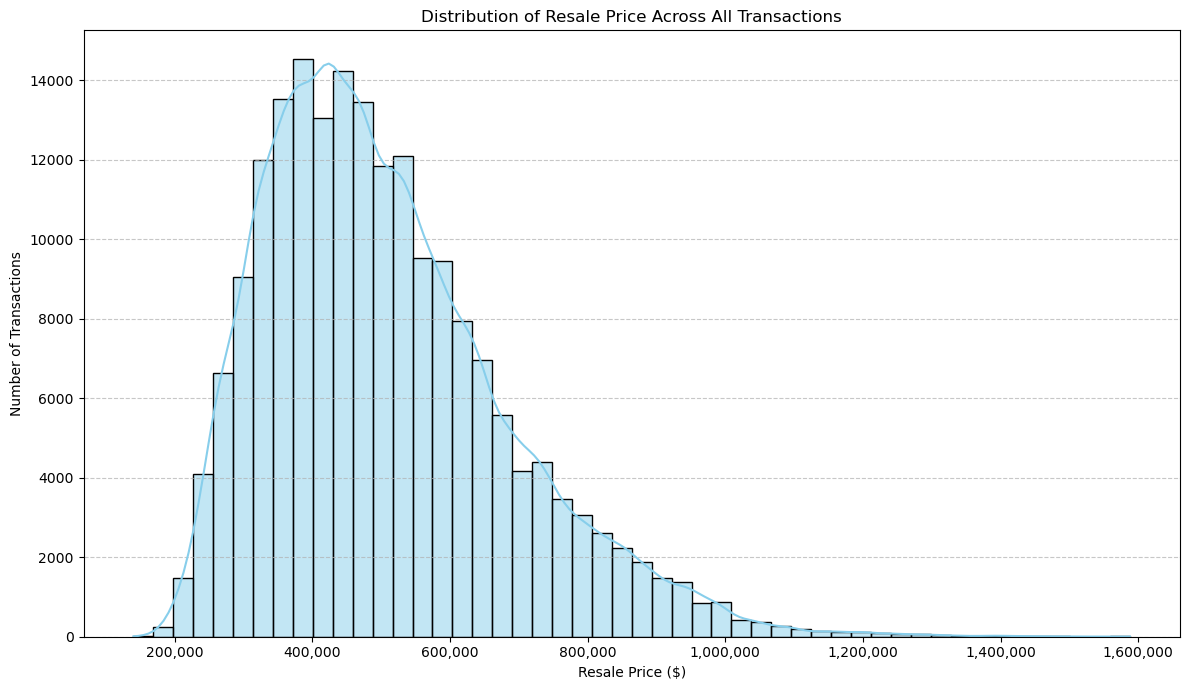

In [98]:
plt.figure(figsize=(12, 7))
sns.histplot(df_4['resale_price'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Resale Price Across All Transactions')
plt.xlabel('Resale Price ($)')
plt.ylabel('Number of Transactions')

# Format x-axis to display readable numbers
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Results from Histogram:
- Right-skewed distribution = Higher no. of transactions at the lower resale price.
- Presence of higher resale price are rarer.
- Median is a better measure as compared to Mean due to outliers

What it means for the HDB Market?
- Most demand falls under the flats that lie within the $400,000 range.

In [101]:
median_resale_price = df_4['resale_price'].median()
median_price_per_sqm = df_4['price_per_sqm'].median()

print(f"Median Resale Price across All Transactions: ${median_resale_price:,.2f}")
print(f"Median Price Per SQM across All Transactions: ${median_price_per_sqm:,.2f}")

Median Resale Price across All Transactions: $475,000.00
Median Price Per SQM across All Transactions: $5,000.00


### Price Analysis
- Price over time
- Inflation vs CAGR

Price Over Time

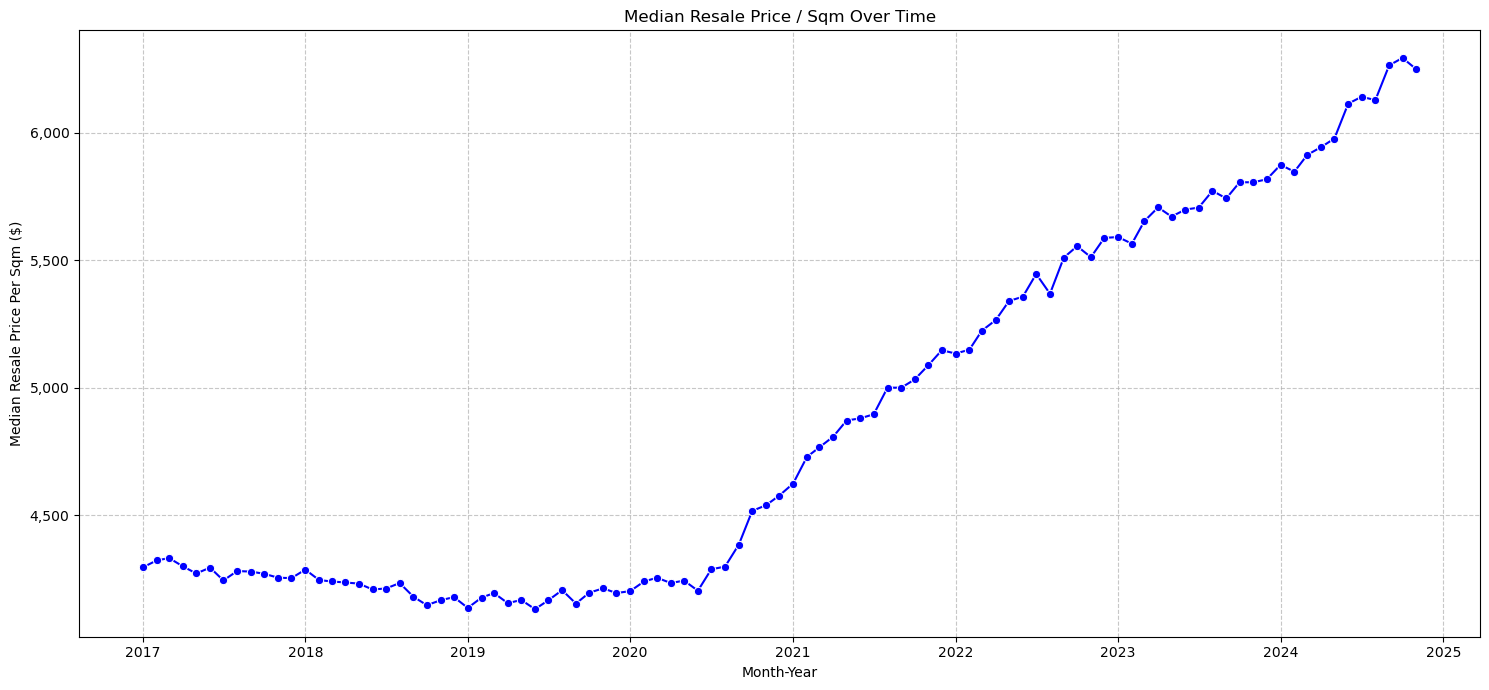

In [104]:
# Ensure 'month' column is in datetime format
df_4['month'] = pd.to_datetime(df_4['month'])

# Calculate median resale price per sqm per month
median_price_per_sqm_over_time = df_4.groupby('month')['price_per_sqm'].median().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='month', y='price_per_sqm', data=median_price_per_sqm_over_time, marker='o', color='blue')

plt.title('Median Resale Price / Sqm Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Median Resale Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Calculate Inflation Rate for Median Per Sqm Price from 2020 onwards + CAGR for 2017-2024:


In [106]:
# Ensure 'month' column is in datetime format
df_4['month'] = pd.to_datetime(df_4['month'])

# Recalculate median price per sqm per month
median_price_per_sqm_overtime = df_4.groupby('month')['price_per_sqm'].median().reset_index()

# Filter data for the years 2020 to 2025
filtered_median_per_sqm_yearly = median_price_per_sqm_overtime[
    (median_price_per_sqm_overtime['month'].dt.year >= 2020) &
    (median_price_per_sqm_overtime['month'].dt.year <= 2025)
].copy()

# Resample to get yearly median prices. Taking the median of the monthly medians for each year.
yearly_median_sqm_price = filtered_median_per_sqm_yearly.set_index('month').resample('YE')['price_per_sqm'].median().reset_index()
yearly_median_sqm_price['year'] = yearly_median_sqm_price['month'].dt.year

# Calculate the annual inflation rate (percentage change year over year)
yearly_median_sqm_price['inflation_rate_pps'] = yearly_median_sqm_price['price_per_sqm'].pct_change() * 100 

# Calculate yearly median resale price
yearly_median_resale_price_overall = df_4.groupby(df_4['month'].dt.year)['resale_price'].median().reset_index()
yearly_median_resale_price_overall.columns = ['year', 'median_resale_price']

# Calculate yearly median price per sqm
yearly_median_price_per_sqm_overall = df_4.groupby(df_4['month'].dt.year)['price_per_sqm'].median().reset_index()
yearly_median_price_per_sqm_overall.columns = ['year', 'median_price_per_sqm']

# Define start and end years
start_year = 2017
end_year = yearly_median_resale_price_overall['year'].max() # Get the latest year from the data

# Filter for start and end years
start_price = yearly_median_resale_price_overall[yearly_median_resale_price_overall['year'] == start_year]['median_resale_price'].iloc[0]
end_price = yearly_median_resale_price_overall[yearly_median_resale_price_overall['year'] == end_year]['median_resale_price'].iloc[0]

start_price_per_sqm = yearly_median_price_per_sqm_overall[yearly_median_price_per_sqm_overall['year'] == start_year]['median_price_per_sqm'].iloc[0]
end_price_per_sqm = yearly_median_price_per_sqm_overall[yearly_median_price_per_sqm_overall['year'] == end_year]['median_price_per_sqm'].iloc[0]

# Calculate number of periods
num_years = end_year - start_year

# Calculate CAGR for Median Resale Price
cagr_resale_price = ((end_price / start_price)**(1/num_years) - 1) * 100

# Calculate CAGR for Median Price Per Sqm
cagr_price_per_sqm = ((end_price_per_sqm / start_price_per_sqm)**(1/num_years) - 1) * 100




print("Annual Inflation Rate of Median Price Per Sqm (2020-2025):")
display(yearly_median_sqm_price[['year', 'price_per_sqm', 'inflation_rate_pps']].round(2))
print(f"CAGR of Median Price Per Sqm ({start_year}-{end_year}): {cagr_price_per_sqm:.2f}%") 

Annual Inflation Rate of Median Price Per Sqm (2020-2025):


,year,price_per_sqm,inflation_rate_pps
0,2020,4270.33,NaN
1,2021,4887.65,14.46
2,2022,5363.00,9.73
3,2023,5707.44,6.42
4,2024,6115.11,7.14


CAGR of Median Price Per Sqm (2017-2024): 5.11%


#### Findings:
- Overall Median Prices over time show an upward trend from 2020 onwards
- However, since 2020, Price Inflation has been showing decreasing trends
- CAGR of Median Prices are around 5%, meaning as of the 2020, the Inflation Rate is still increasing at a greater rate than the CAGR --> **Indicative of Housing becoming Less Affordable.**

## 3.2) Structural Factors and Resale Price Analysis 
*Key Graphs:*
- 1) Correlation Heatmap of Structural Factors vs Resale Prices
- 2) Median Resale Price / Sqm VS Flat Type
- 3) Median Resale Price / Sqm VS Floor Area
- 4) Heatmap of Median Resale Price / Sqm VS Flat Type + Story Range

Basic Understanding of Flat Type, Flat Model and Floor Area Data

Number of flats per flat_type:


flat_type
4 ROOM              81967
5 ROOM              48091
3 ROOM              46071
EXECUTIVE           14301
2 ROOM               3586
MULTI-GENERATION       80
1 ROOM                 74
Name: count, dtype: int64

/var/folders/2w/z7_24rf9307gh7smq49n57mw0000gn/T/ipykernel_55698/3592752617.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_4['flat_type'], order=df_4['flat_type'].value_counts().index, palette='viridis', legend=False)


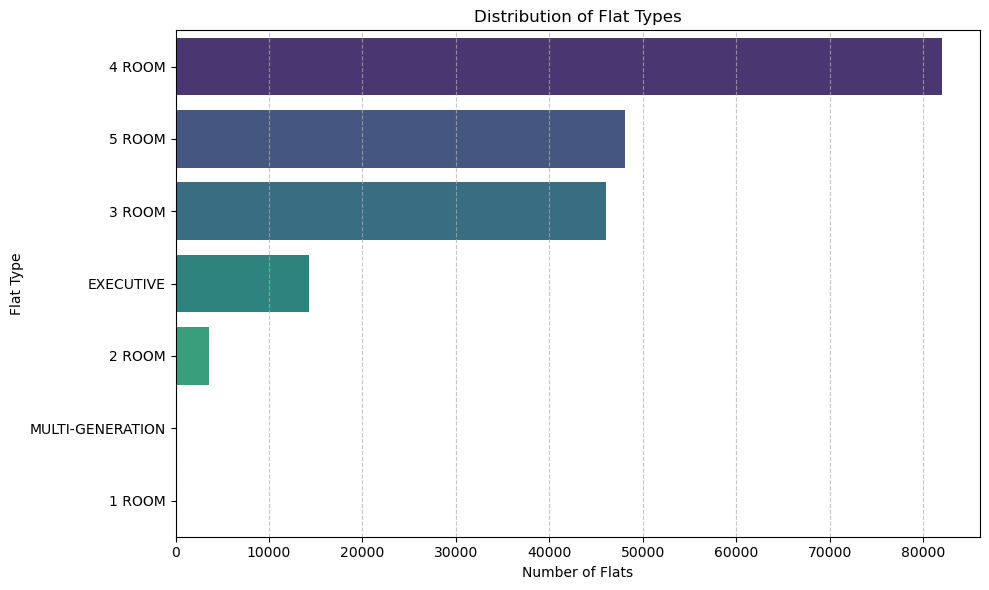

In [128]:
print("Number of flats per flat_type:")
display(df_4['flat_type'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(y=df_4['flat_type'], order=df_4['flat_type'].value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Flat Types')
plt.xlabel('Number of Flats')
plt.ylabel('Flat Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [126]:
# Pull all unique flat model names
unique_flat_models = df_4['flat_model'].unique()
print("Unique Flat Models:")
for model in unique_flat_models:
    print(f"  - {model}")

print(f"\nTotal number of unique flat models: {len(unique_flat_models)}")

Unique Flat Models:
  - Improved
  - New Generation
  - DBSS
  - Standard
  - Apartment
  - Simplified
  - Model A
  - Premium Apartment
  - Adjoined flat
  - Model A-Maisonette
  - Maisonette
  - Type S1
  - Type S2
  - Model A2
  - Terrace
  - Improved-Maisonette
  - Premium Maisonette
  - Multi Generation
  - Premium Apartment Loft
  - 2-room
  - 3Gen

Total number of unique flat models: 21


/var/folders/2w/z7_24rf9307gh7smq49n57mw0000gn/T/ipykernel_55698/2384503587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='flat_model', y='price_per_sqm', data=df_4, palette='Set2')


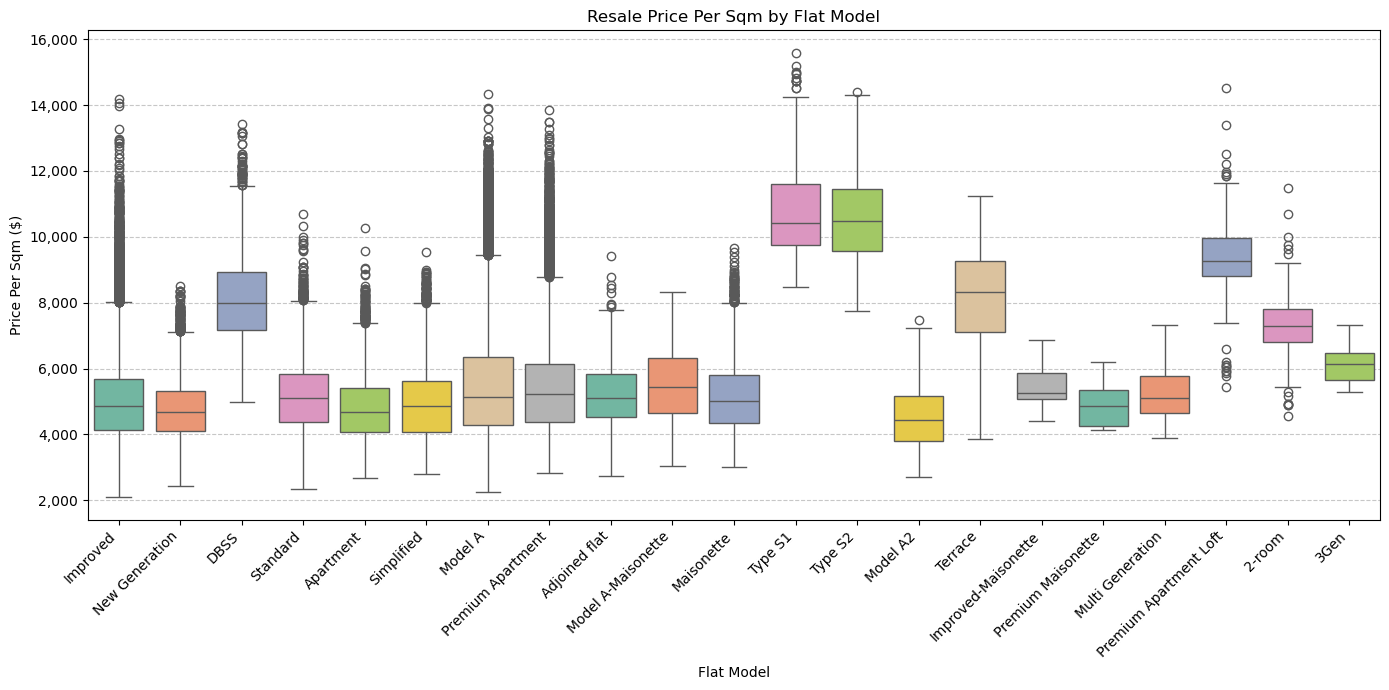

In [130]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='flat_model', y='price_per_sqm', data=df_4, palette='Set2')
plt.title('Resale Price Per Sqm by Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Creating copy dataframe for easy analysis of Structural Factors. 

In [112]:
# Hierarchy from smallest to largest
flat_type_order_map = {
    "1 ROOM": 1,
    "2 ROOM": 2,
    "3 ROOM": 3,
    "4 ROOM": 4,
    "5 ROOM": 5,
    "EXECUTIVE": 6,
    "MULTI-GENERATION": 7,
}

structural_factors = [ "flat_type",
    "flat_type_order",
    "floor_area_sqm",
    "remaining_lease_years",
    "resale_price",
    "price_per_sqm",
]

sf_eda_df = df_4.copy()
# add price_per_sqm if df_4 doesn’t already have it
if "price_per_sqm" not in sf_eda_df:
   sf_eda_df["price_per_sqm"] = sf_eda_df["resale_price"] / sf_eda_df["floor_area_sqm"]

sf_eda_df["flat_type_order"] = sf_eda_df["flat_type"].map(flat_type_order_map)

# keep only the structural factor columns
sf_eda_df = sf_eda_df[structural_factors]

sf_eda_df.sample(3)

,flat_type,flat_type_order,floor_area_sqm,remaining_lease_years,resale_price,price_per_sqm
78233,5 ROOM,5,118.0,83.250000,538000.0,4559.322034
143596,4 ROOM,4,92.0,54.333333,557000.0,6054.347826
150662,5 ROOM,5,113.0,93.583333,650000.0,5752.212389


### 1) Correlation Heatmap

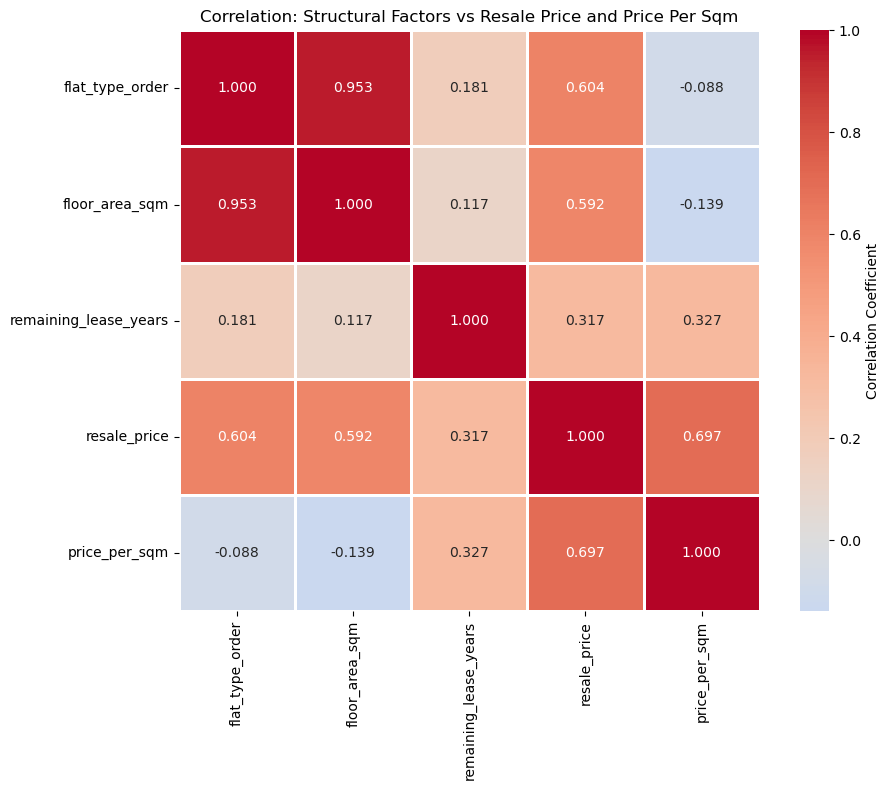

In [115]:
# Calculate correlation matrix for structural factors and pricing
structural_factors = ['flat_type_order', 'floor_area_sqm', 'remaining_lease_years', 'resale_price', 'price_per_sqm']
correlation_matrix = sf_eda_df[structural_factors].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation: Structural Factors vs Resale Price and Price Per Sqm')
plt.tight_layout()
plt.show()

### 2) Median Resale Price per SQM / Flat Type 

/var/folders/2w/z7_24rf9307gh7smq49n57mw0000gn/T/ipykernel_55698/446454902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='flat_type', y='price_per_sqm', data=sf_eda_df, palette='Set2', order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])


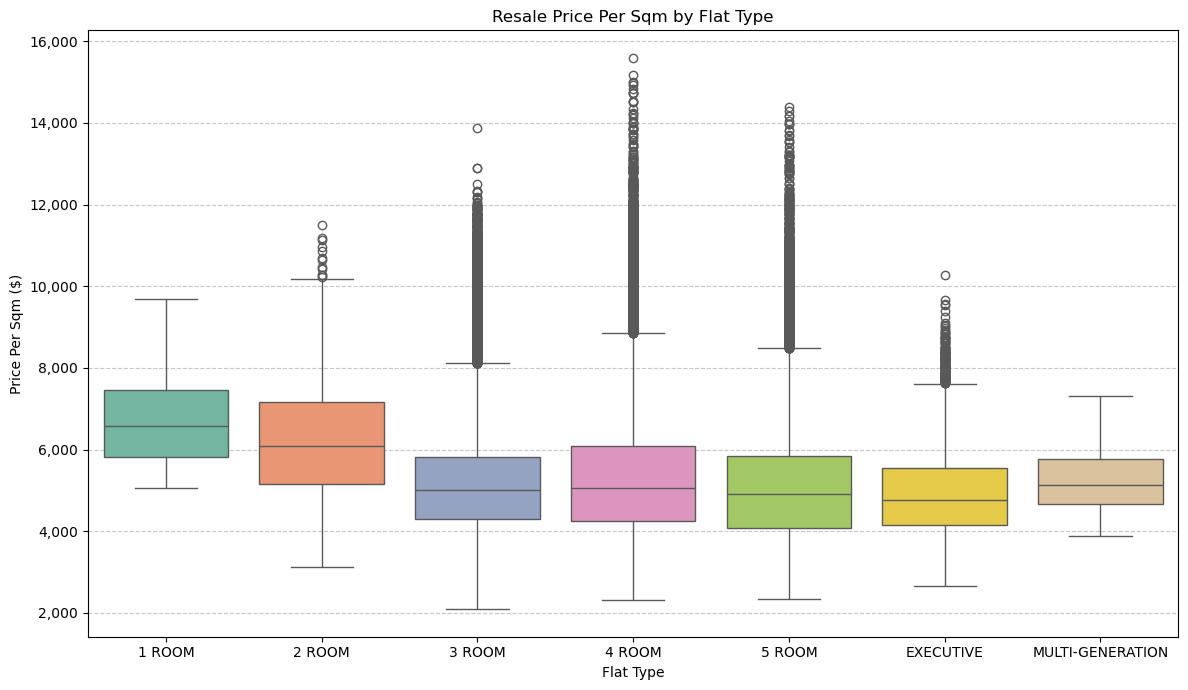

In [116]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='flat_type', y='price_per_sqm', data=sf_eda_df, palette='Set2', order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])
plt.title('Resale Price Per Sqm by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3) Resale Price per SQM / Floor Area (SQM)

Creating Area Categorisation for Floor Area (SQM)

In [120]:
area_bins = [0, 50, 70, 90, 110, 130, 150, float("inf")]
area_labels = ["<50", "50-69", "70-89", "90-109", "110-129", "130-149", ">= 150"]

sf_eda_df["floor_area_category"] = pd.cut(
    sf_eda_df["floor_area_sqm"],
    bins=area_bins,
    labels=area_labels,
    include_lowest=True,
    right=False,  # 50 goes into 50-69, 150 goes into 150+
)

/var/folders/2w/z7_24rf9307gh7smq49n57mw0000gn/T/ipykernel_55698/686163576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='floor_area_category', y='price_per_sqm', data=sf_eda_df, palette='Set2')


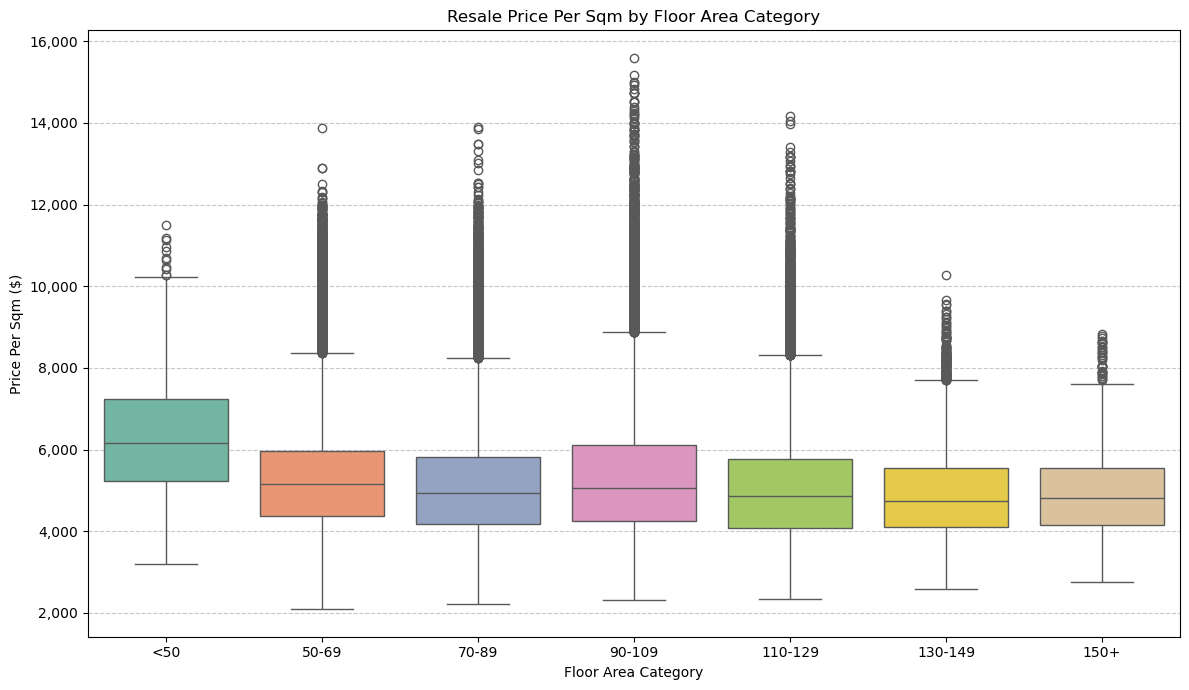

In [119]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='floor_area_category', y='price_per_sqm', data=sf_eda_df, palette='Set2')
plt.title('Resale Price Per Sqm by Floor Area Category')
plt.xlabel('Floor Area Category')
plt.ylabel('Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### BONUS: Median Resale Pricer per SQM Overtime by Flat Type

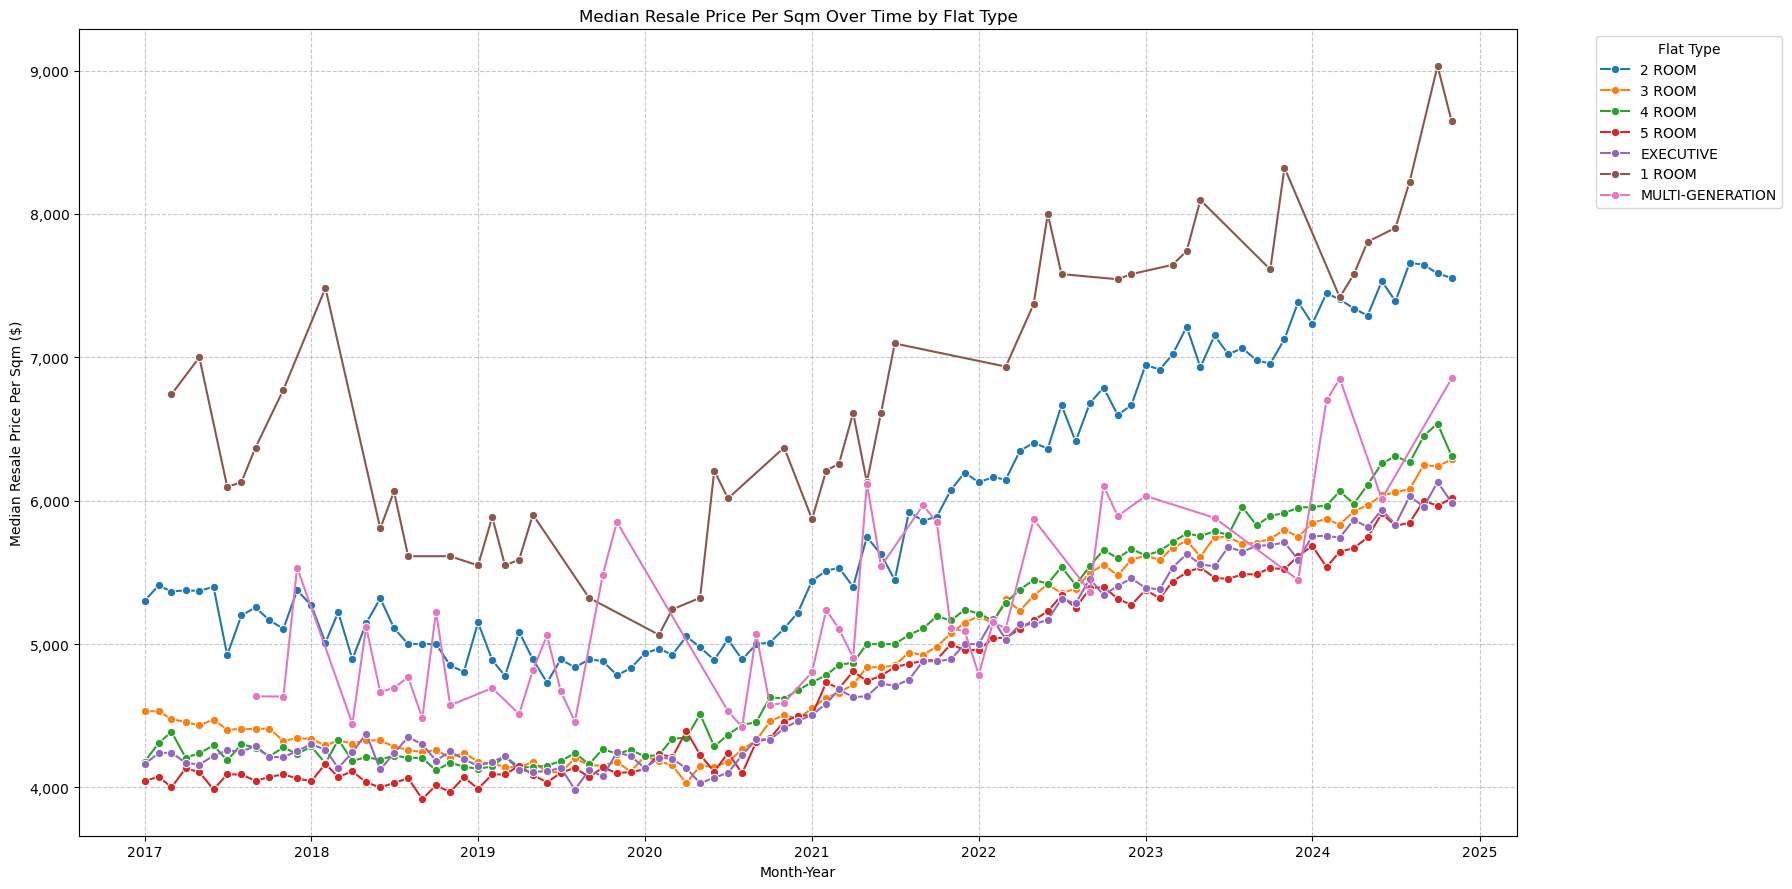

In [129]:
# Ensure 'month' column is in datetime format
df_4['month'] = pd.to_datetime(df_4['month'])

# Calculate median price_per_sqm per month for each flat_type
median_price_per_sqm_by_flat_type_over_time = df_4.groupby(['month', 'flat_type'])['price_per_sqm'].median().reset_index()

plt.figure(figsize=(18, 9))
sns.lineplot(x='month', y='price_per_sqm', hue='flat_type', data=median_price_per_sqm_by_flat_type_over_time, marker='o', palette='tab10')

plt.title('Median Resale Price Per Sqm Over Time by Flat Type')
plt.xlabel('Month-Year')
plt.ylabel('Median Resale Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Flat Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4) Heatmap of Median Resale Price / Sqm VS Flat Type + Story Range

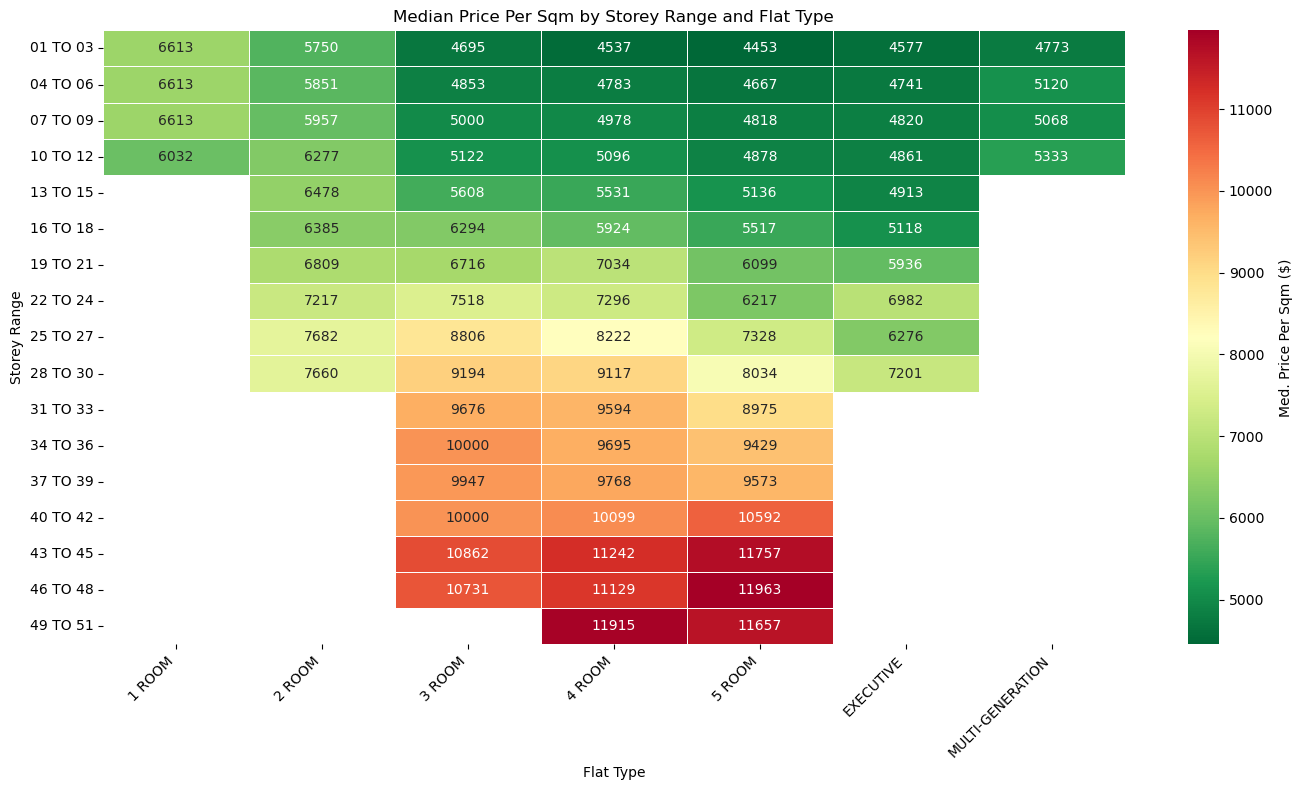

In [122]:
# Calculate median price_per_sqm for each storey_range and flat_type combination
storey_flat_type_pivot = df_4.groupby(['storey_range', 'flat_type'])['price_per_sqm'].median().unstack()


plt.figure(figsize=(14, 8))
sns.heatmap(storey_flat_type_pivot, annot=True, fmt=".0f", cmap="RdYlGn_r", linewidths=.5, cbar_kws={'label': 'Med. Price Per Sqm ($)'})
plt.title('Median Price Per Sqm by Storey Range and Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Storey Range')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 3.3) Temporal (Locational and other) Factors and Resale Price Analysis 
- 1) Median Resale Price VS Remaining Lease Years


### 1.1) Median Resale Price vs Remaining Lease (Years)

Note: you may need to restart the kernel to use updated packages.


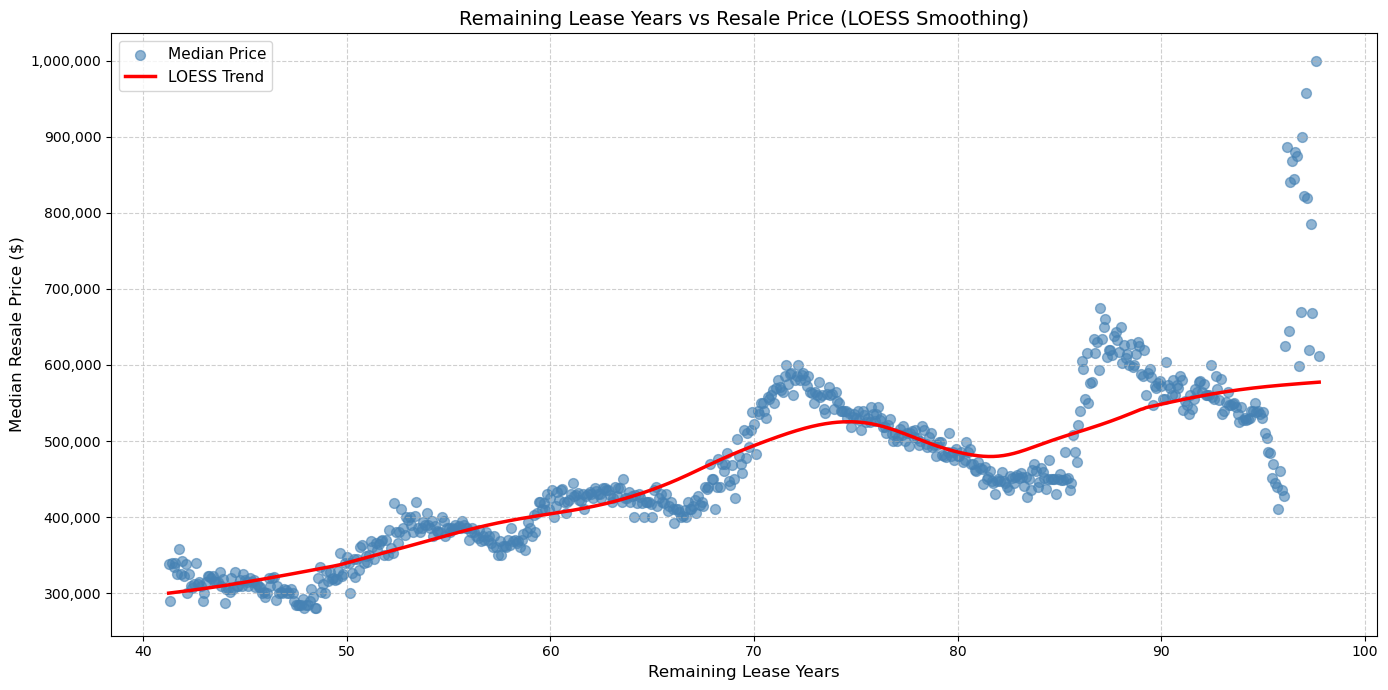

In [123]:
%pip install statsmodels
from statsmodels.nonparametric.smoothers_lowess import lowess

# Prepare data: group by remaining_lease_years and get median resale_price
lease_price_data = df_4.groupby('remaining_lease_years')['resale_price'].median().reset_index()

# Create scatter plot with LOESS smooth curve
plt.figure(figsize=(14, 7))

# Scatter plot
plt.scatter(lease_price_data['remaining_lease_years'], lease_price_data['resale_price'], 
            alpha=0.6, s=50, color='steelblue', label='Median Price')

# LOESS smoothing
loess_result = lowess(lease_price_data['resale_price'], lease_price_data['remaining_lease_years'], frac=0.3)
plt.plot(loess_result[:, 0], loess_result[:, 1], color='red', linewidth=2.5, label='LOESS Trend')

plt.title('Remaining Lease Years vs Resale Price (LOESS Smoothing)', fontsize=14)
plt.xlabel('Remaining Lease Years', fontsize=12)
plt.ylabel('Median Resale Price ($)', fontsize=12)

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

### 1.2) Median Resale Price per SQM vs Flat Age

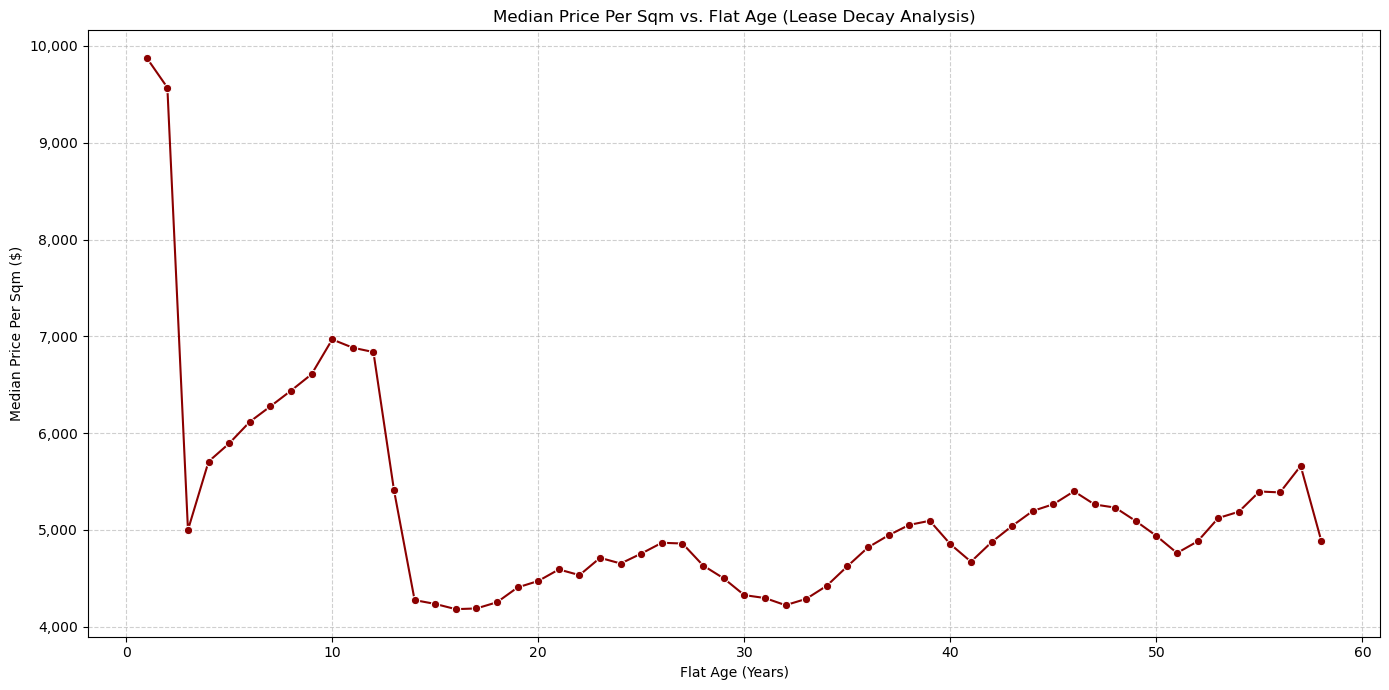

In [133]:
# Calculate median price_per_sqm for each remaining_lease_years
lease_decay_data = df_4.groupby('flat_age')['price_per_sqm'].median().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='flat_age', y='price_per_sqm', data=lease_decay_data, marker='o', color='darkred')

plt.title('Median Price Per Sqm vs. Flat Age (Lease Decay Analysis)')
plt.xlabel('Flat Age (Years)')
plt.ylabel('Median Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

### 2) Heatmap of Town and Flat Type vs Median Price Per SQM

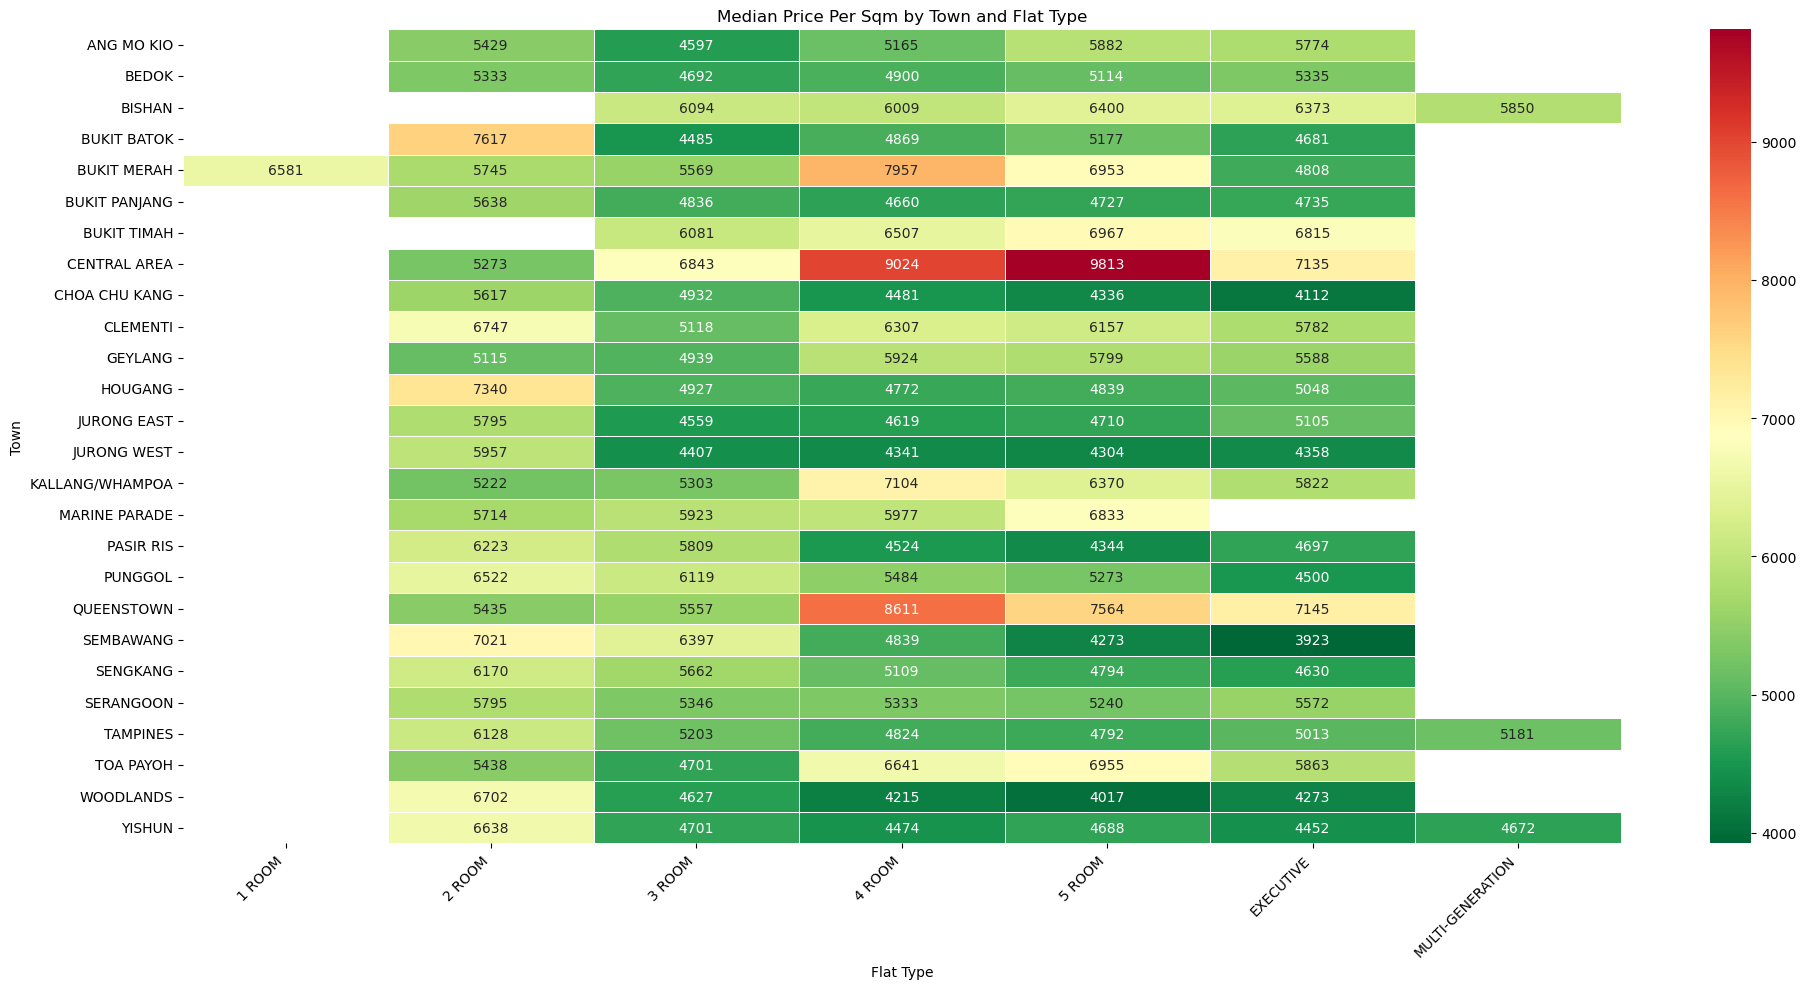

In [125]:
# Calculate median price_per_sqm for each town and flat_type
median_price_per_sqm_pivot = df_4.groupby(['town', 'flat_type'])['price_per_sqm'].median().unstack()

plt.figure(figsize=(20, 10)) # Adjust figure size for readability
sns.heatmap(median_price_per_sqm_pivot, annot=True, fmt=".0f", cmap="RdYlGn_r", linewidths=.5)
plt.title('Median Price Per Sqm by Town and Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Town')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 3) Price Per Sqm Distribution by Town
- Informs us on affordability per town

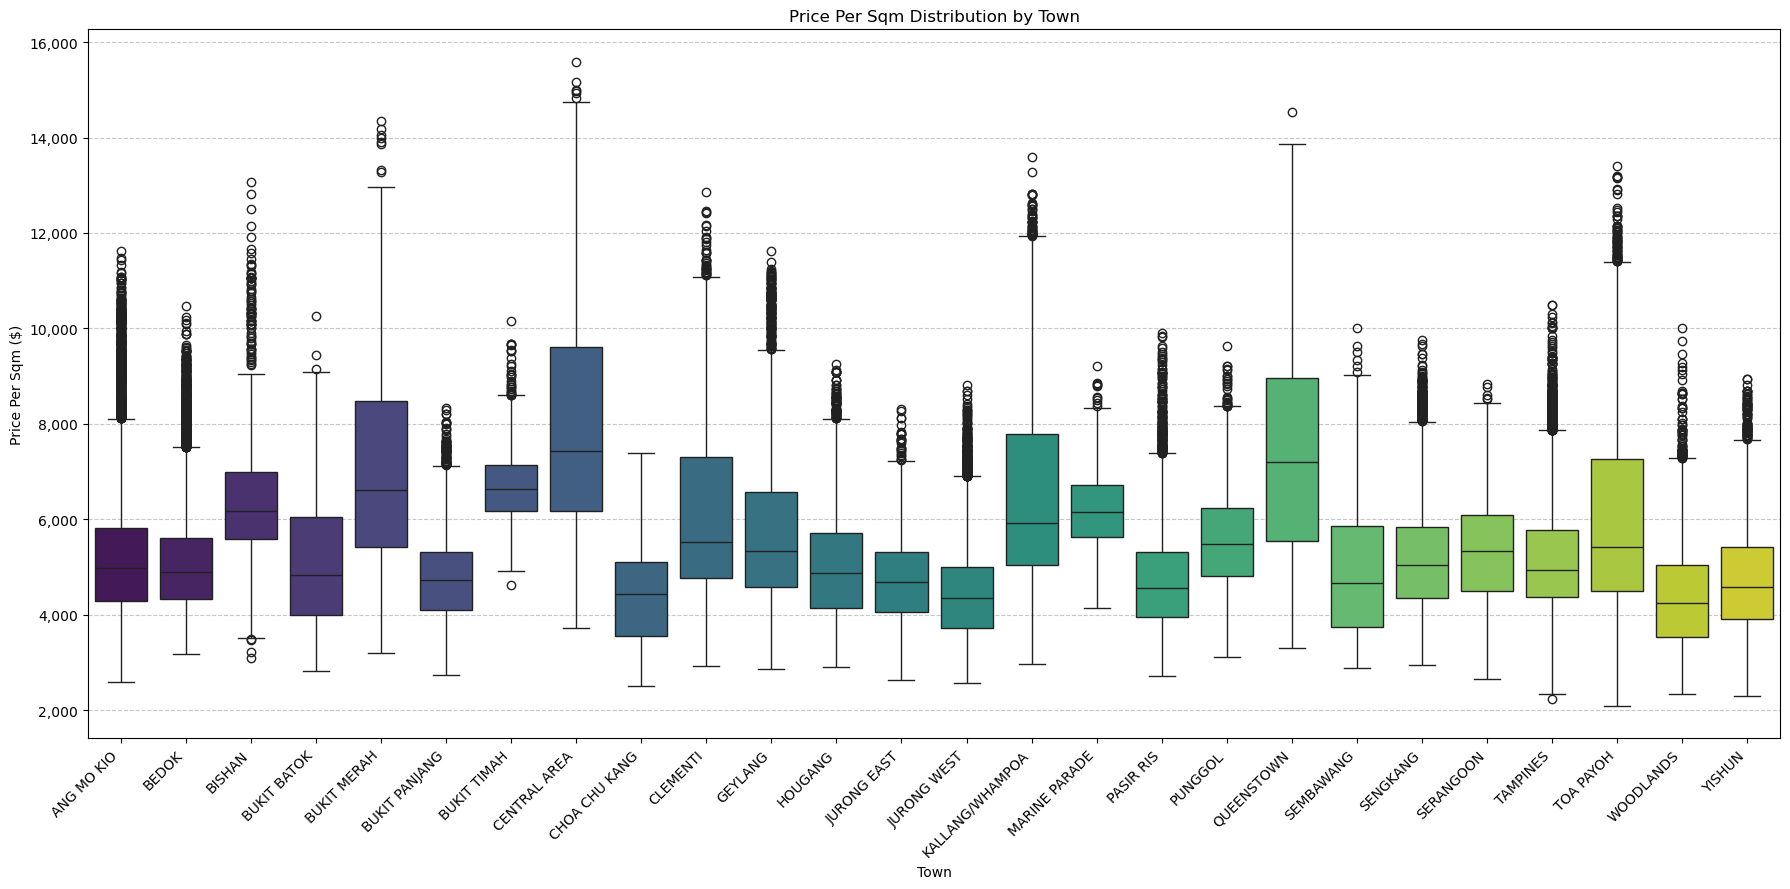

In [131]:
plt.figure(figsize=(18, 9))
sns.boxplot(x='town', y='price_per_sqm', data=df_4, palette='viridis', hue='town', legend=False)
plt.title('Price Per Sqm Distribution by Town')
plt.xlabel('Town')
plt.ylabel('Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4) Distribution of Flat Age by Town
- Tells us the supply of older/younger flats in each town
- Informs us on Housing Stock 

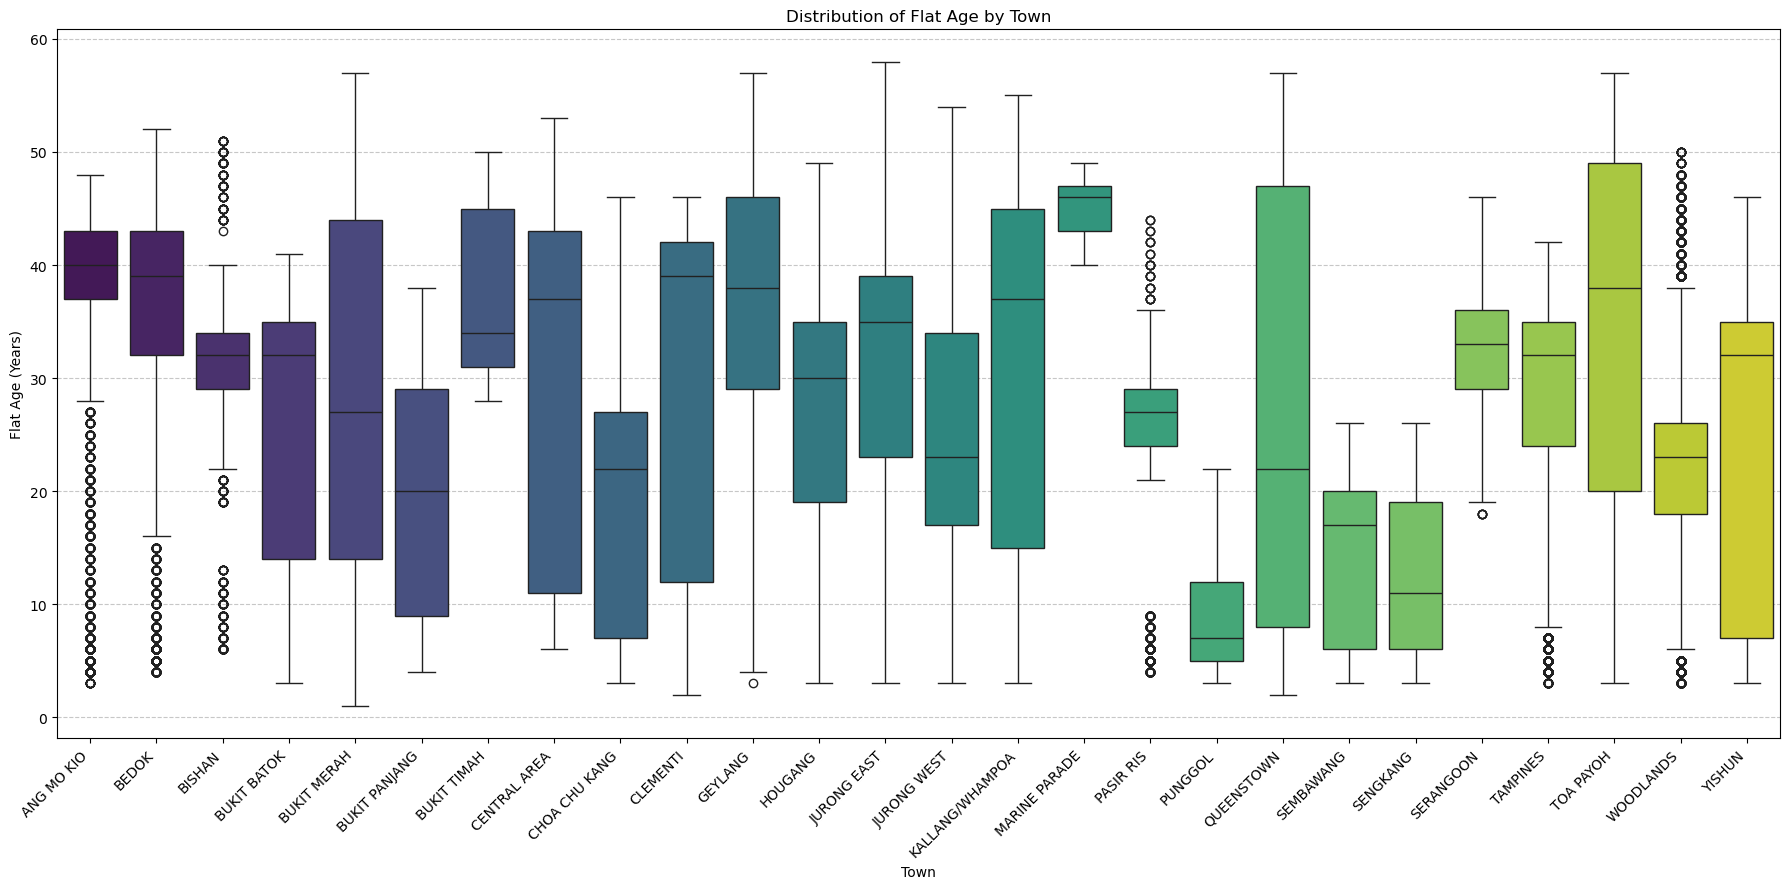

In [132]:
plt.figure(figsize=(18, 9))
sns.boxplot(x='town', y='flat_age', data=df_4, palette='viridis', hue='town', legend=False)
plt.title('Distribution of Flat Age by Town')
plt.xlabel('Town')
plt.ylabel('Flat Age (Years)')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4) Preparing Data for Machine Learning (ML) Pipeline
- Further Cleaning and Encode
- Additional Essential Features
- Dropping Unneccesary Features
- Checking multicollinarity
- Checking correlation
- Select Features for Modelling (Part of ML Process)

### 4.1) Further Cleaning and Encoding + Additional Essential Features
- Categorical data into Numerical data - such as Town, Flat Type, Flat_Model , etc.

In [135]:
df_4.dtypes

month                            datetime64[ns]
town                                     object
flat_type                                object
block                                    object
street_name                              object
storey_range                             object
floor_area_sqm                          float64
flat_model                               object
lease_commence_date                       int64
resale_price                            float64
price_per_sqm                           float64
trans_year                                int32
flat_age                                  int64
remaining_lease_years                   float64
full_address                             object
latitude                                float64
longitude                               float64
postal_code                              object
distance_to_nearest_mrt_km              float64
nearest_mrt_name                         object
nearest_mrt_lat                         

### Changing 'storey_range' into a numerical value by taking the average of the range indicated

In [137]:
def convert_storey_range_to_avg(storey_range_str):
    if pd.isna(storey_range_str):
        return np.nan
    parts = storey_range_str.split(' TO ')
    if len(parts) == 2:
        try:
            lower = int(parts[0])
            upper = int(parts[1])
            return (lower + upper) / 2
        except ValueError:
            return np.nan # Handle cases where conversion to int fails
    return np.nan # Handle unexpected formats

# Apply the conversion function to create a new 'storey_avg' column
df_4['storey_avg'] = df_4['storey_range'].apply(convert_storey_range_to_avg)

# Display a sample of the updated DataFrame with the new 'storey_avg' column
print("DataFrame after converting 'storey_range' to 'storey_avg':")
display(df_4[['storey_range', 'storey_avg']].sample(10))

DataFrame after converting 'storey_range' to 'storey_avg':


,storey_range,storey_avg
181147,10 TO 12,11.0
107115,10 TO 12,11.0
114591,10 TO 12,11.0
27524,07 TO 09,8.0
21210,07 TO 09,8.0
187814,10 TO 12,11.0
101791,04 TO 06,5.0
143444,01 TO 03,2.0
105956,04 TO 06,5.0
110723,19 TO 21,20.0


### Identifying Numerical Variables that are going to be fed into ML Pipeline

In [138]:
numerical_cols_upd = df_4.select_dtypes(include=np.number).columns
print("Numerical Columns:")
for col in numerical_cols_upd:
    print(col)

Numerical Columns:
floor_area_sqm
lease_commence_date
resale_price
price_per_sqm
trans_year
flat_age
remaining_lease_years
latitude
longitude
distance_to_nearest_mrt_km
nearest_mrt_lat
nearest_mrt_lng
nearest_school_lat
nearest_school_lon
distance_to_nearest_school_km
distance_to_nearest_mall_km
nearest_mall_lat
nearest_mall_lon
storey_avg


Checking for columns for missing data

In [140]:
print("Missing values in numerical columns:")
print(df_4[numerical_cols_upd].isnull().sum())

Missing values in numerical columns:
floor_area_sqm                   0
lease_commence_date              0
resale_price                     0
price_per_sqm                    0
trans_year                       0
flat_age                         0
remaining_lease_years            0
latitude                         0
longitude                        0
distance_to_nearest_mrt_km       0
nearest_mrt_lat                  0
nearest_mrt_lng                  0
nearest_school_lat               0
nearest_school_lon               0
distance_to_nearest_school_km    0
distance_to_nearest_mall_km      0
nearest_mall_lat                 0
nearest_mall_lon                 0
storey_avg                       0
dtype: int64


### Checking for Correlation

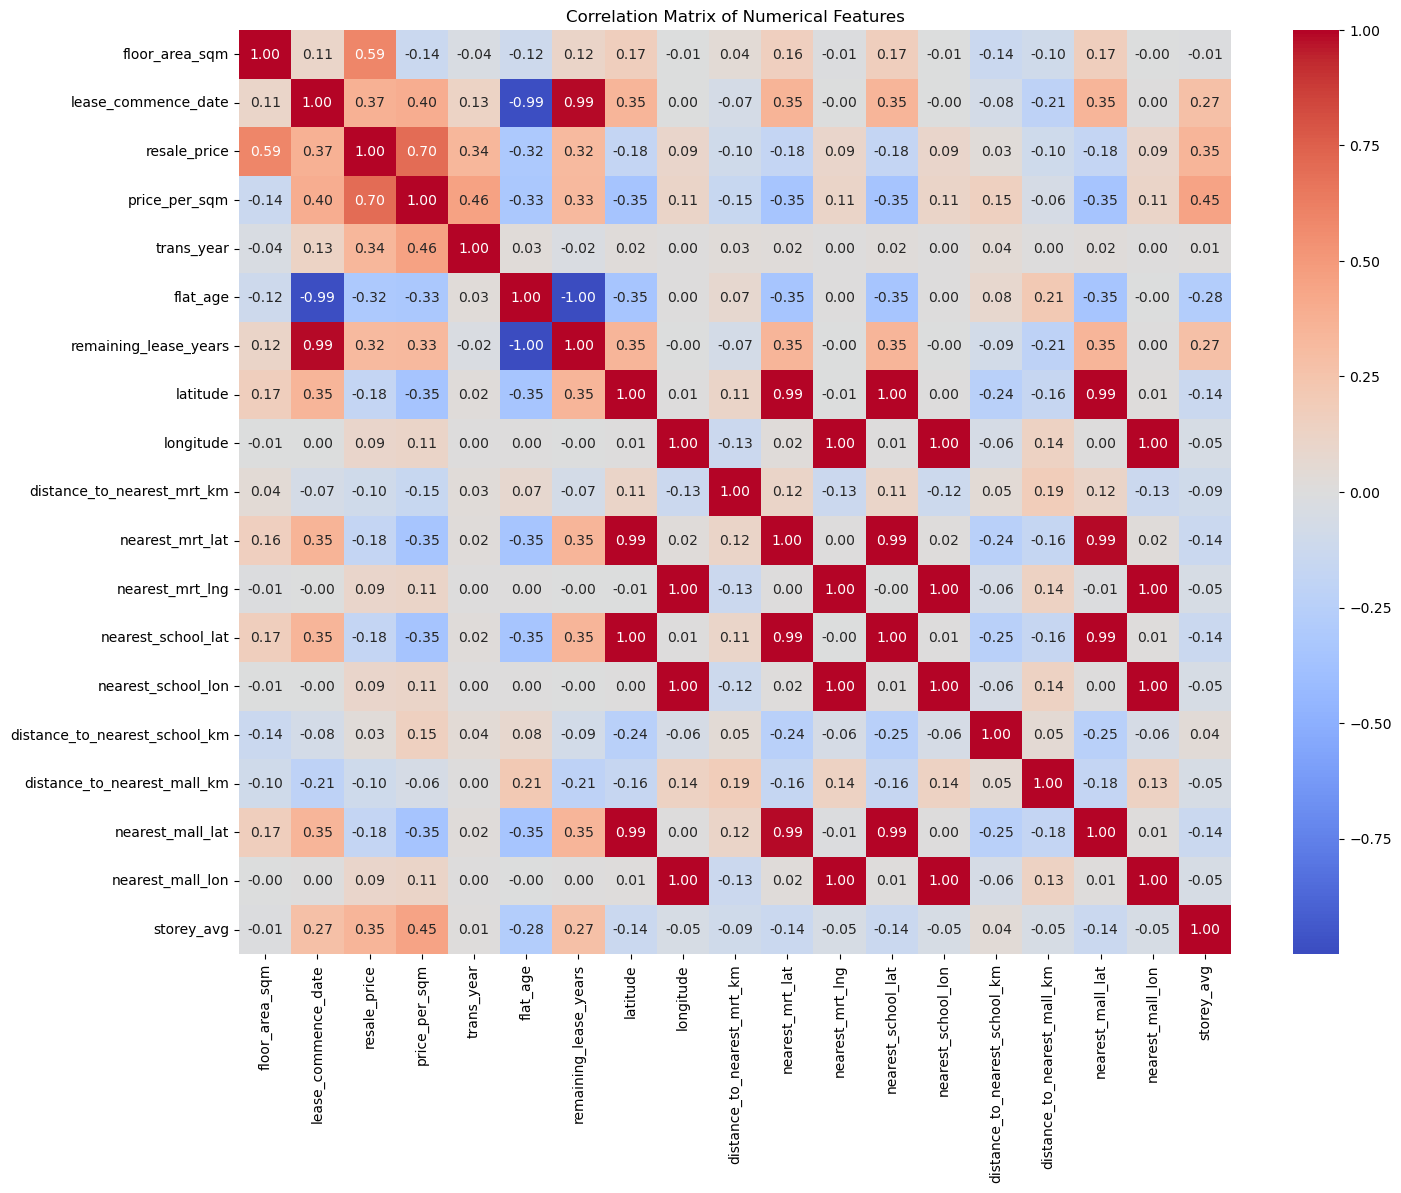

In [142]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_4.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Identified Features to Drop. Dropping features that will cause negative effect to the ML Prediction Model. 

In [143]:

# Features to drop based on multicollinearity + leakage
features_to_drop = [
    # Duplicates of remaining_lease_years
    "lease_commence_date",
    "flat_age",

    # Coordinates of nearest amenities (duplicate information)
    "nearest_mrt_lat",
    "nearest_mrt_lng",
    "nearest_school_lat",
    "nearest_school_lon",
    "nearest_mall_lat",
    "nearest_mall_lon",

    # Leakage (derived directly from target)
    "price_per_sqm",

    # Optional (weak influence)
    # Uncomment if you want to drop
    # "trans_year",
]

# Drop the columns safely only if they exist
df_5 = df_4.drop(columns=[col for col in features_to_drop if col in df_4.columns], errors='ignore')

print("Dropped these columns:")
print([col for col in features_to_drop if col in df_4.columns])

print("\nRemaining columns:")
print(df_5.columns)


Dropped these columns:
['lease_commence_date', 'flat_age', 'nearest_mrt_lat', 'nearest_mrt_lng', 'nearest_school_lat', 'nearest_school_lon', 'nearest_mall_lat', 'nearest_mall_lon', 'price_per_sqm']

Remaining columns:
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'resale_price', 'trans_year',
       'remaining_lease_years', 'full_address', 'latitude', 'longitude',
       'postal_code', 'distance_to_nearest_mrt_km', 'nearest_mrt_name',
       'schools_within_1km', 'schools_within_1_to_2km', 'nearest_school_name',
       'distance_to_nearest_school_km', 'distance_to_nearest_mall_km',
       'nearest_mall_name', 'storey_avg'],
      dtype='object')


Dropping all irrelevant / non-encodable categories. 
- storey_range : already converted to storey_avg
- full_address , nearest_school_name, block, street_name, postal_code, nearest_mrt_name, nearest_mall_name 

In [163]:
# Columns to drop (non-encodable / replaced)
drop_cols = [
    "storey_range",        # replaced by storey_avg
    "full_address",
    "month",  # temporal leakage
    "nearest_school_name",
    "flat_model", # not relevant for future policies 
    "block",
    "street_name",
    "postal_code",
    "nearest_mrt_name",
    "schools_within_1km",
    "schools_within_1_to_2km",
    "nearest_mall_name",
]

df_6 = df_5.drop(columns=drop_cols, errors="ignore").copy()

df_6.sample(3)

,town,flat_type,floor_area_sqm,resale_price,trans_year,remaining_lease_years,latitude,longitude,distance_to_nearest_mrt_km,distance_to_nearest_school_km,distance_to_nearest_mall_km,storey_avg
103644,WOODLANDS,3 ROOM,73.0,280000.0,2021,57.5833,1.4434,103.7729,1.2084,0.5077,1.3442,8.0
36945,BEDOK,4 ROOM,92.0,412000.0,2018,60.5000,1.3283,103.9318,0.5050,0.1665,0.3449,2.0
72116,QUEENSTOWN,5 ROOM,125.0,600000.0,2020,55.2500,1.3054,103.7813,0.7318,0.2187,0.7655,14.0


## One-hot Encoding for Town and Flat Type

In [164]:
# One-hot encode town and flat_type
df_7 = pd.get_dummies(
    df_6,
    columns=["town", "flat_type"],
    prefix=["town", "flat_type"],
    dtype=int
)

df_7.sample(5)

,floor_area_sqm,resale_price,trans_year,remaining_lease_years,latitude,longitude,distance_to_nearest_mrt_km,distance_to_nearest_school_km,distance_to_nearest_mall_km,storey_avg,...,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION
109750,59.0,450000.0,2021,54.5000,1.2756,103.8424,0.4945,0.2705,0.1560,8.0,...,0,0,0,0,0,1,0,0,0,0
185224,121.0,700000.0,2024,75.7500,1.3850,103.9033,0.1653,0.2333,0.1484,14.0,...,0,0,0,0,0,0,0,1,0,0
13120,66.0,252000.0,2017,51.9167,1.3379,103.8566,1.0986,0.1871,1.1160,2.0,...,1,0,0,0,0,1,0,0,0,0
88181,105.0,665000.0,2021,81.1667,1.3088,103.8521,0.3796,0.4201,0.3355,17.0,...,0,0,0,0,0,0,0,1,0,0
127281,122.0,612000.0,2022,64.9167,1.3446,103.9513,0.2707,0.4915,0.2779,8.0,...,0,0,0,0,0,0,0,1,0,0


# 5) Machine Learning 
- perform ML Train-test-split
- measure using Linear Regression
- measure using Random Forest
- measure using XGBoost

> Note: Use df_7 for Machine Learning

Importing relevant libraries and functions once more.

In [165]:
%pip install xgboost
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


Checking for Nan values

In [166]:
print("Total missing values detected:", df_7.isna().sum().sum())

Total missing values detected: 0


Creating copy of Dataframe, df_7 for cleanliness.

In [167]:
df_ML = df_7.copy()
df_ML.columns

Index(['floor_area_sqm', 'resale_price', 'trans_year', 'remaining_lease_years',
       'latitude', 'longitude', 'distance_to_nearest_mrt_km',
       'distance_to_nearest_school_km', 'distance_to_nearest_mall_km',
       'storey_avg', 'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN',
       'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG',
       'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
       'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM',
       'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM',
       'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION'],
      dtype='object')

In [168]:
df_ML.sample(3)

,floor_area_sqm,resale_price,trans_year,remaining_lease_years,latitude,longitude,distance_to_nearest_mrt_km,distance_to_nearest_school_km,distance_to_nearest_mall_km,storey_avg,...,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION
28305,134.0,590000.0,2018,57.9167,1.3688,103.8416,0.8963,0.1736,0.5951,5.0,...,0,0,0,0,0,0,0,1,0,0
79892,84.0,381500.0,2020,66.3333,1.3519,103.9347,0.8038,0.2125,1.0163,5.0,...,0,0,0,0,0,0,1,0,0,0
6826,67.0,290000.0,2017,67.4167,1.3468,103.7240,0.4611,0.1552,1.2862,2.0,...,0,0,0,0,0,1,0,0,0,0


## Perform Train-test-split

In [169]:
x = df_ML.drop("resale_price", axis=1)
y = df_ML["resale_price"]

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42) 

Checking for categorical cols in train data.

In [173]:
x_train.dtypes.value_counts()
print(x_train.columns)

Index(['floor_area_sqm', 'trans_year', 'remaining_lease_years', 'latitude',
       'longitude', 'distance_to_nearest_mrt_km',
       'distance_to_nearest_school_km', 'distance_to_nearest_mall_km',
       'storey_avg', 'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN',
       'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG',
       'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
       'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM',
       'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM',
       'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION'],
      dtype='object')


### Run Random Forest Regressor (Manually)

In [181]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# x_train, x_test, y_train, y_test already created

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Fit
rf_model.fit(x_train, y_train)

# Predict
y_pred = rf_model.predict(x_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)

print("Random Forest Regressor Performance:")
print(f"MAE:  {mae_rf:,.0f}")
print(f"RMSE: {rmse_rf:,.0f}")
print(f"R²:   {r2_rf:.4f}")

Random Forest Regressor Performance:
MAE:  20,557
RMSE: 29,131
R²:   0.9728


### Run XGBoost Regressor (Manually)

In [176]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- XGBoost model (no preprocessing, since data is already numeric) ---

xgb_model = XGBRegressor(
    n_estimators=400,        # number of trees
    learning_rate=0.05,     # step size
    max_depth=6,            # tree depth
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # feature sampling
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Fit
xgb_model.fit(x_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Performance:")
print(f"MAE:  {mae_xgb:,.0f}")
print(f"RMSE: {rmse_xgb:,.0f}")
print(f"R²:   {r2_xgb:.4f}")


XGBoost Performance:
MAE:  22,886
RMSE: 31,217
R²:   0.9688


### Run Linear Regression (Manually)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
)
import numpy as np
import pandas as pd

# Fit LR
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Predict
y_pred_lr = lr_model.predict(x_test)

# Metrics
mae_lr  = mean_absolute_error(y_test, y_pred_lr)
mse_lr  = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr   = r2_score(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100

print(f"Linear Regression -> MAE: {mae_lr:.4f}, MSE: {mse_lr:.4f}, "
      f"RMSE: {rmse_lr:.4f}, R2: {r2_lr:.4f}, MAPE: {mape_lr:.2f}%")

# Coefficients (relationship strength/sign)
lr_coeffs = (
    pd.DataFrame({"feature": x_train.columns, "coef": lr_model.coef_})
    .sort_values("coef", ascending=False)
    .reset_index(drop=True)
)

print(f"\nIntercept: {lr_model.intercept_:.4f}")
print("\nTop coefficients:")
display(lr_coeffs.head(15))


Linear Regression -> MAE: 50786.4461, MSE: 4355580859.7055, RMSE: 65996.8246, R2: 0.8604, MAPE: 10.89%

Intercept: -79647476.4316

Top coefficients:


,feature,coef
0,town_BUKIT TIMAH,197464.913117
1,town_MARINE PARADE,177557.648288
2,longitude,171860.945834
3,town_BISHAN,132996.111364
4,town_CENTRAL AREA,101067.759362
5,flat_type_MULTI-GENERATION,99067.766812
6,town_QUEENSTOWN,70816.726591
7,town_TOA PAYOH,59349.687791
8,town_ANG MO KIO,54165.316554
9,town_BUKIT MERAH,53168.109349


### Plot Random Forest Feature Importance Bar Chart


In [ ]:
# --- Feature importance for Random Forest model ---
importances = rf_model.feature_importances_

# Get feature names from x_train directly
all_feature_names = x_train.columns

feat_imp = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=True)


plt.figure(figsize=(10, 6))
bars = plt.barh(feat_imp["Feature"], feat_imp["Importance"])
plt.xlabel("Importance")
plt.title("Feature Importances")


for bar, value in zip(bars, feat_imp["Importance"]):
    plt.text(value + 0.001, bar.get_y() + bar.get_height()/2,
             f"{value:.3f}", va="center")


plt.xlim(0, feat_imp["Importance"].max() * 1.1)
plt.tight_layout()
plt.show()

### Plot Actual vs Predicted Price graphs for the models


In [ ]:
#Define function for plot graph
def plot_actual_vs_predicted(models, X_test, y_test):


    for name, model in models.items():
        # Predict
        y_pred = model.predict(X_test)

        # Plot
        plt.figure(figsize=(6,6))
        plt.scatter(y_test, y_pred, s=8, alpha=0.6)
        plt.plot(
            [y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()],
            "r--",
            linewidth=2
        )

        plt.xlabel("Actual Resale Price")
        plt.ylabel("Predicted Resale Price")
        plt.title(f"Actual vs Predicted — {name}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [ ]:
#List of models
models = {
    "Random Forest" : rf_model,
    "XGBoost" : xgb_model,
    "Linear Regression": lr_model
}

#Call the function
plot_actual_vs_predicted(models, x_test, y_test)

## ⭐ How to Interpret the Linear Regression Coefficients

Each coefficient represents the expected change in resale price when that variable increases by one unit, while holding all other variables constant.

For one-hot encoded categorical variables (e.g., towns, flat types), the coefficient shows how much more or less expensive that category is compared to the baseline category that was dropped during encoding.
>Example: A coefficient of +132,996 for town_BISHAN means Bishan flats are predicted to be about $133k more expensive than the baseline town, all else equal.

For numeric variables (e.g., remaining lease, floor area, coordinates), the coefficient tells you how much resale price changes for a 1-unit increase in that variable.
>Example: A positive coefficient for trans_year indicates an upward price trend over time.

Coefficients help identify which structural, locational, and temporal factors contribute most to price differences.
However, because linear regression assumes perfect linearity and is sensitive to multicollinearity, the exact numbers should not be taken literally. Instead, use them to understand relative influence and direction of impact (positive vs negative), rather than exact dollar amounts.

The intercept should be ignored, as it represents the predicted price when all variables equal zero — a scenario that is not meaningful for real-world HDB flats.

## Comparing the 3 Models

In [187]:
import pandas as pd

results = pd.DataFrame(
    {
        "MAE":  [mae_rf,  mae_xgb, mae_lr],
        "RMSE": [rmse_rf, rmse_xgb, rmse_lr],
        "R2":   [r2_rf,   r2_xgb, r2_lr],
    },
    index=["RandomForest", "XGBoost", "LinearRegression"]
)

# Identify best per metric: lower for error, higher for R2
best = pd.Series({
    "MAE":  results["MAE"].idxmin(),
    "RMSE": results["RMSE"].idxmin(),
    "R2":   results["R2"].idxmax(),
})

print("Random Forest vs XGBoost (MAE, RMSE, R²)")
print(results)
print("\nBest by metric:")
print(best)

# Optional overall pick: majority vote across metrics
overall = best.mode()[0]
print(f"\nOverall pick by majority of metrics: {overall}")

Random Forest vs XGBoost (MAE, RMSE, R²)
                           MAE          RMSE        R2
RandomForest      20556.723667  29130.913896  0.972806
XGBoost           22885.815643  31216.752585  0.968772
LinearRegression  50786.446137  65996.824618  0.860423

Best by metric:
MAE     RandomForest
RMSE    RandomForest
R2      RandomForest
dtype: object

Overall pick by majority of metrics: RandomForest


## Running the full RandomForest Metrics

In [185]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
)
import pandas as pd
import numpy as np

# Predict with RF
y_pred_rf = rf_model.predict(x_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_rf) * 100

print(f"RandomForest metrics -> MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, "
      f"R2: {r2:.4f}, MAPE: {mape:.2f}%")

# Feature importance
rf_importance = (
    pd.DataFrame({
        "feature": x_train.columns,
        "importance": rf_model.feature_importances_,
    })
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

print("\nTop 10 feature importances:")
display(rf_importance.head(10))

RandomForest metrics -> MAE: 20556.7237, MSE: 848610144.4081, RMSE: 29130.9139, R2: 0.9728, MAPE: 4.15%

Top 10 feature importances:


,feature,importance
0,floor_area_sqm,0.426640
1,latitude,0.166784
2,trans_year,0.135572
3,remaining_lease_years,0.102591
4,longitude,0.065765
5,storey_avg,0.024763
6,distance_to_nearest_mrt_km,0.015614
7,town_BISHAN,0.010969
8,distance_to_nearest_mall_km,0.010304
9,distance_to_nearest_school_km,0.006228


# 6) Creating Small Feature Builder + Pipeline for User Interaction

Saving Geocode into a .parquet file for Feature Building without calling APIs consistently (for small demo purposes)

In [188]:
import pandas as pd
from pathlib import Path

keep_cols = [
    "full_address", "town", "latitude", "longitude",
    "distance_to_nearest_mrt_km", "nearest_mrt_name",
    "distance_to_nearest_school_km", "nearest_school_name",
    "distance_to_nearest_mall_km", "nearest_mall_name",
]

distance_lookup = (
    df_4[keep_cols]
    .dropna(subset=["latitude", "longitude"])
    .drop_duplicates(subset="full_address")
    .copy()
)

Path("hdb_chatbot/geocode").mkdir(parents=True, exist_ok=True)
out_path = "hdb_chatbot/geocode/distance_lookup.parquet"
distance_lookup.to_parquet(out_path, index=False)

print(f"Saved {len(distance_lookup)} rows to {out_path}")

Saved 9598 rows to hdb_chatbot/geocode/distance_lookup.parquet


Validating save.

In [189]:
import pandas as pd

path = "hdb_chatbot/geocode/distance_lookup.parquet"
df_geo = pd.read_parquet(path)

print("Shape:", df_geo.shape)
print("Columns:", df_geo.columns.tolist())
display(df_geo.head())      # first 5 rows
display(df_geo.sample(5))   # random 5 rows


Shape: (9598, 10)
Columns: ['full_address', 'town', 'latitude', 'longitude', 'distance_to_nearest_mrt_km', 'nearest_mrt_name', 'distance_to_nearest_school_km', 'nearest_school_name', 'distance_to_nearest_mall_km', 'nearest_mall_name']


,full_address,town,latitude,longitude,distance_to_nearest_mrt_km,nearest_mrt_name,distance_to_nearest_school_km,nearest_school_name,distance_to_nearest_mall_km,nearest_mall_name
0,406 ANG MO KIO AVE 10,ANG MO KIO,1.3620,103.8539,1.0114,Ang Mo Kio,0.2292,TOWNSVILLE PRIMARY SCHOOL,1.0312,Ang Mo Kio Hub
1,108 ANG MO KIO AVE 4,ANG MO KIO,1.3710,103.8382,1.2700,Ang Mo Kio,0.2422,ANG MO KIO PRIMARY SCHOOL,0.8691,Broadway Plaza
2,602 ANG MO KIO AVE 5,ANG MO KIO,1.3807,103.8354,1.0686,Yio Chu Kang,0.7759,ANDERSON PRIMARY SCHOOL,1.5290,Broadway Plaza
3,465 ANG MO KIO AVE 10,ANG MO KIO,1.3662,103.8572,0.9471,Ang Mo Kio,0.5180,DEYI SECONDARY SCHOOL,0.8920,myVillage
4,601 ANG MO KIO AVE 5,ANG MO KIO,1.3810,103.8351,1.0914,Yio Chu Kang,0.7814,ANDERSON PRIMARY SCHOOL,1.5729,Broadway Plaza


,full_address,town,latitude,longitude,distance_to_nearest_mrt_km,nearest_mrt_name,distance_to_nearest_school_km,nearest_school_name,distance_to_nearest_mall_km,nearest_mall_name
60,50 CHAI CHEE ST,BEDOK,1.3293,103.9224,0.8215,Bedok North,0.6725,DAMAI PRIMARY SCHOOL,0.8686,Djitsun Mall Bedok
9492,183C WOODLANDS ST 13,WOODLANDS,1.4347,103.7767,0.3680,Marsiling,0.2350,MARSILING SECONDARY SCHOOL,0.3800,Marsiling Mall Hawker Centre
3265,136 TECK WHYE LANE,CHOA CHU KANG,1.3799,103.7517,0.3271,Keat Hong,0.5072,TECK WHYE PRIMARY SCHOOL,0.8569,Keat Hong Shopping Centre
2619,80 STRATHMORE AVE,QUEENSTOWN,1.2946,103.8097,0.4227,Queenstown,0.2514,QUEENSTOWN PRIMARY SCHOOL,0.2618,Dawson Place
3054,177 ANG MO KIO AVE 4,ANG MO KIO,1.3758,103.8381,1.0028,Yio Chu Kang,0.5040,CHIJ ST. NICHOLAS GIRLS' SCHOOL,0.9733,Broadway Plaza


# IMPORTANT: FULL PIPELINE

In [193]:
import re
import pandas as pd
import numpy as np
import joblib
from pathlib import Path
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# --- Config ---
LOOKUP_PATH = "hdb_chatbot/geocode/distance_lookup.parquet"
MODEL_PATH = "hdb_chatbot/geocode/rf_hdb_pipeline.pkl"

# Load lookup (one row per town with lat/lon and distance fields)
dist_lookup = pd.read_parquet(LOOKUP_PATH)

def parse_storey_range(storey_range_str):
    """Parse storey range strings like '01 TO 05', '1-5', '3 to 7' (case-insensitive)."""
    if pd.isna(storey_range_str):
        return np.nan
    s = str(storey_range_str).upper()
    nums = re.findall(r"\d+", s)
    if len(nums) >= 2:
        return (int(nums[0]) + int(nums[1])) / 2
    if len(nums) == 1:  # fallback if only one number provided
        return float(nums[0])
    raise ValueError("storey_range must include at least one number, e.g. '01 TO 05'")

def build_feature_df(town, flat_type, storey_range, floor_area_sqm, remaining_lease_years, trans_year=None):
    base = pd.DataFrame([{
        "town": town,
        "flat_type": flat_type,
        "floor_area_sqm": floor_area_sqm,
        "remaining_lease_years": remaining_lease_years,
        "storey_avg": parse_storey_range(storey_range),
        "trans_year": trans_year or datetime.now().year,
    }])
    # Merge on town; if a town is missing in the lookup, numeric imputer will fill distances/coords
    enriched = base.merge(dist_lookup, on="town", how="left")
    return enriched

# Columns used by the model
categorical_cols = ["town", "flat_type"]
numeric_cols = [
    "floor_area_sqm",
    "remaining_lease_years",
    "storey_avg",
    "trans_year",
    "latitude",
    "longitude",
    "distance_to_nearest_mrt_km",
    "distance_to_nearest_school_km",
    "distance_to_nearest_mall_km",
]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", Pipeline([("imputer", SimpleImputer(strategy="mean"))]), numeric_cols),
    ]
)

rf_model = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)
pipeline = Pipeline([("prep", preprocess), ("model", rf_model)])

# ---------- Training ----------
# Ensure df_ML has trans_year already; if not, compute from your date column
if "trans_year" not in df_ML.columns and "month" in df_ML.columns:
    df_ML = df_ML.copy()
    df_ML["trans_year"] = pd.to_datetime(df_ML["month"]).dt.year

train_df = df_ML.copy()
if "latitude" not in train_df.columns:  # attach lookup if training data lacks lat/lon/distances
    train_df = train_df.merge(dist_lookup, on="town", how="left")

# Recreate raw town/flat_type if they’re only present as one-hot columns
town_cols = [c for c in train_df.columns if c.startswith("town_")]
flat_cols = [c for c in train_df.columns if c.startswith("flat_type_")]

if "town" not in train_df.columns and town_cols:
    train_df["town"] = train_df[town_cols].idxmax(axis=1).str.replace("town_", "", regex=False)
if "flat_type" not in train_df.columns and flat_cols:
    train_df["flat_type"] = train_df[flat_cols].idxmax(axis=1).str.replace("flat_type_", "", regex=False)

x_train = train_df[categorical_cols + numeric_cols]
y_train = train_df["resale_price"]

pipeline.fit(x_train, y_train)
Path("hdb_chatbot/geocode").mkdir(parents=True, exist_ok=True)
joblib.dump(pipeline, MODEL_PATH)

# ---------- Prediction (callable from streamlit_app.py) ----------
rf_pipeline = joblib.load(MODEL_PATH)

def predict_price(town, flat_type, storey_range, floor_area_sqm, remaining_lease_years, trans_year=None):
    features = build_feature_df(town, flat_type, storey_range, floor_area_sqm, remaining_lease_years, trans_year)
    return float(rf_pipeline.predict(features)[0])

# Example:
# price = predict_price("ANG MO KIO", "4 ROOM", "01 TO 05", 90, 80, trans_year=2024)
# print(f"Predicted price: ${price:,.0f}")


Test

In [194]:

# Quick test prediction
try:
    test_price = predict_price(
        town="ANG MO KIO",
        flat_type="4 ROOM",
        storey_range="01 to 05",  # case/format flexible
        floor_area_sqm=90,
        remaining_lease_years=80,
        trans_year=2024,  # or None
    )
    print(f"Predicted price: ${test_price:,.0f}")
except Exception as e:
    print("Test failed:", e)


Predicted price: $643,958


In [195]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.6.1
